In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import warnings
import statsmodels.tsa.api as tsa
from pylab import rcParams
import itertools
import os
import datetime
from datetime import datetime

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
rcParams['figure.figsize'] = 18,10

In [605]:
dataset = pd.read_excel('코로나-지하철 데이터세트 최종.xlsx')

In [751]:
dataset_total_1 = pd.read_excel('서울시 코로나19 확진자 발생동향_1.xlsx')

In [723]:
dataset_total = dataset_total.drop('계(명)', axis=1)

In [724]:
date_1_start = '2020-02-05'
date_1_end = '2020-08-05'
date_2_start = '2021-01-27'
date_2_end = '2021-06-25'
date_3_start = '2021-07-10'
date_3_end = '2021-11-05'
date_4_start = '2022-07-10'
date_4_end = '2022-11-07'

list1 = [date_1_start, date_2_start, date_3_start, date_4_start]
list2 = [date_1_end, date_2_end, date_3_end, date_4_end]

* 시계열 분해 
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle/Residiual(불규칙 또는 순환 요인)

In [718]:
def get_trend(a):
    for i in range(4):
        date_start = list1[i]
        date_end = list2[i]
        cond1 = (dataset_total['date'] >= date_start)
        cond2 = (dataset_total['date'] <= date_end)

        df_trend = dataset_total[cond1&cond2]
        df_pivot = pd.pivot_table(data=df_trend, index='date', values=a, aggfunc='mean')
        df_y = df_pivot[a].resample('1D').mean()

        # 시계열 모델 생성
        model_seires = tsa.seasonal_decompose(df_y, model='additive')
        # 모델 시각화
        fig = model_seires.plot()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------')

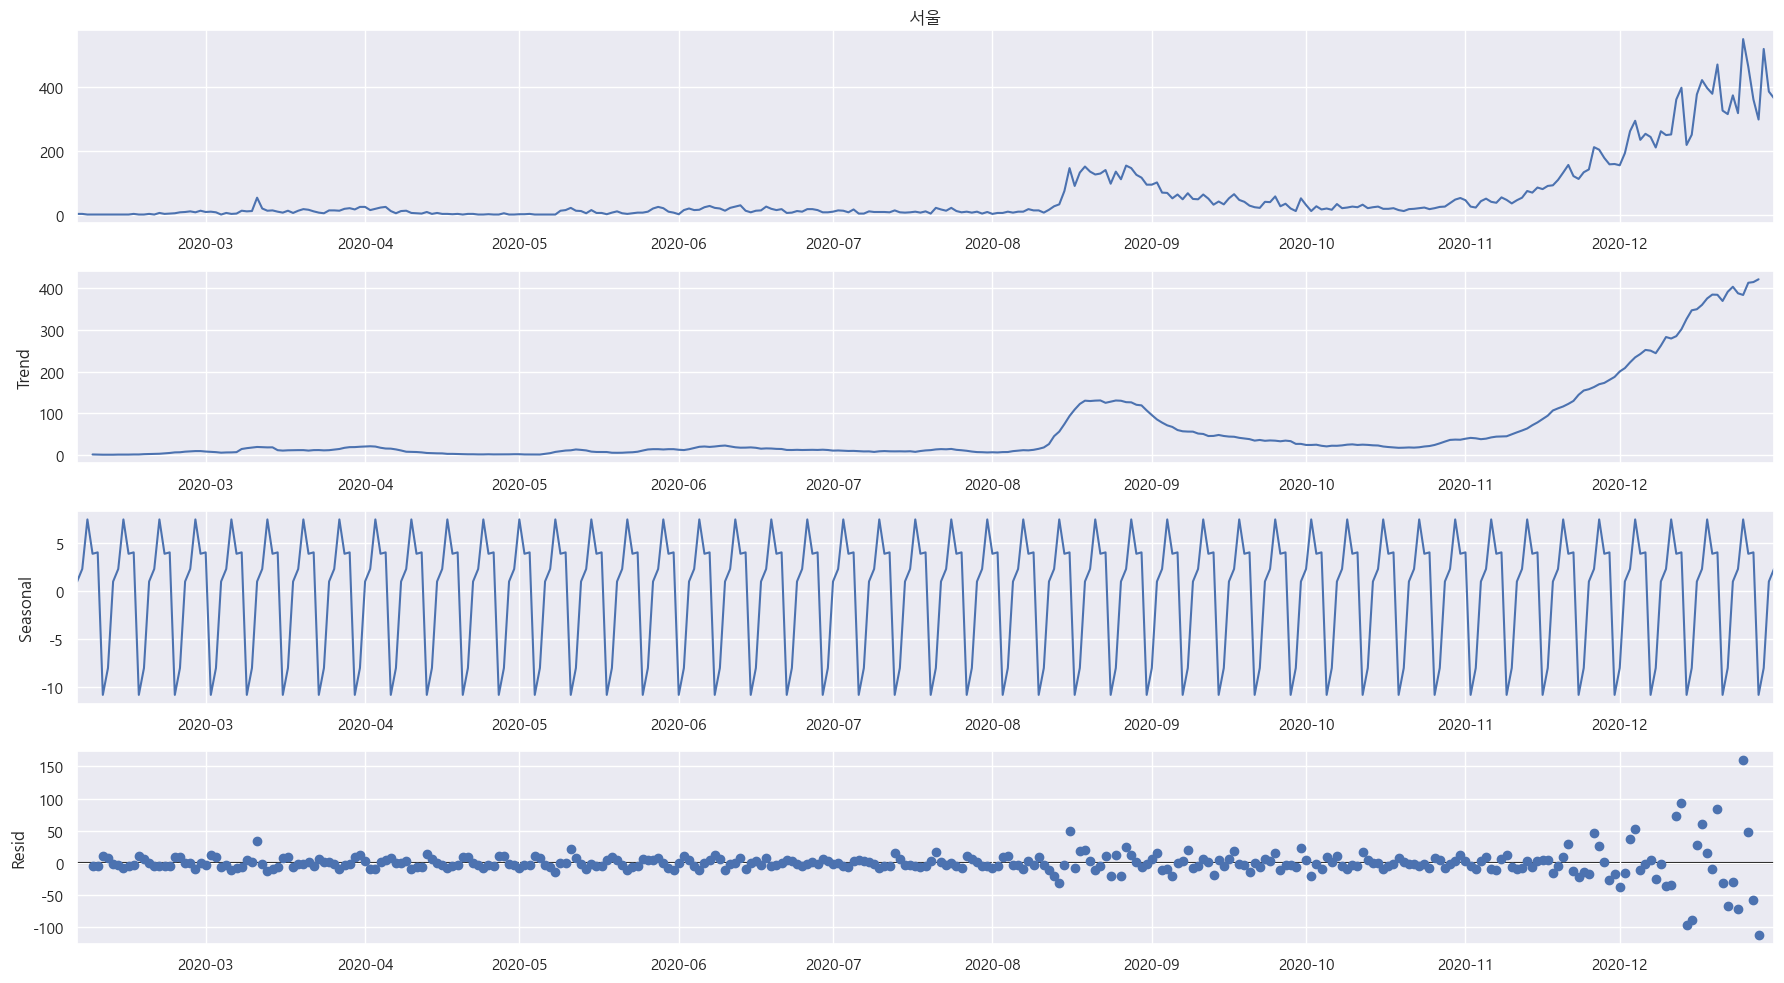

In [715]:
def get_seg(start_date, end_date):
    df_s = dataset

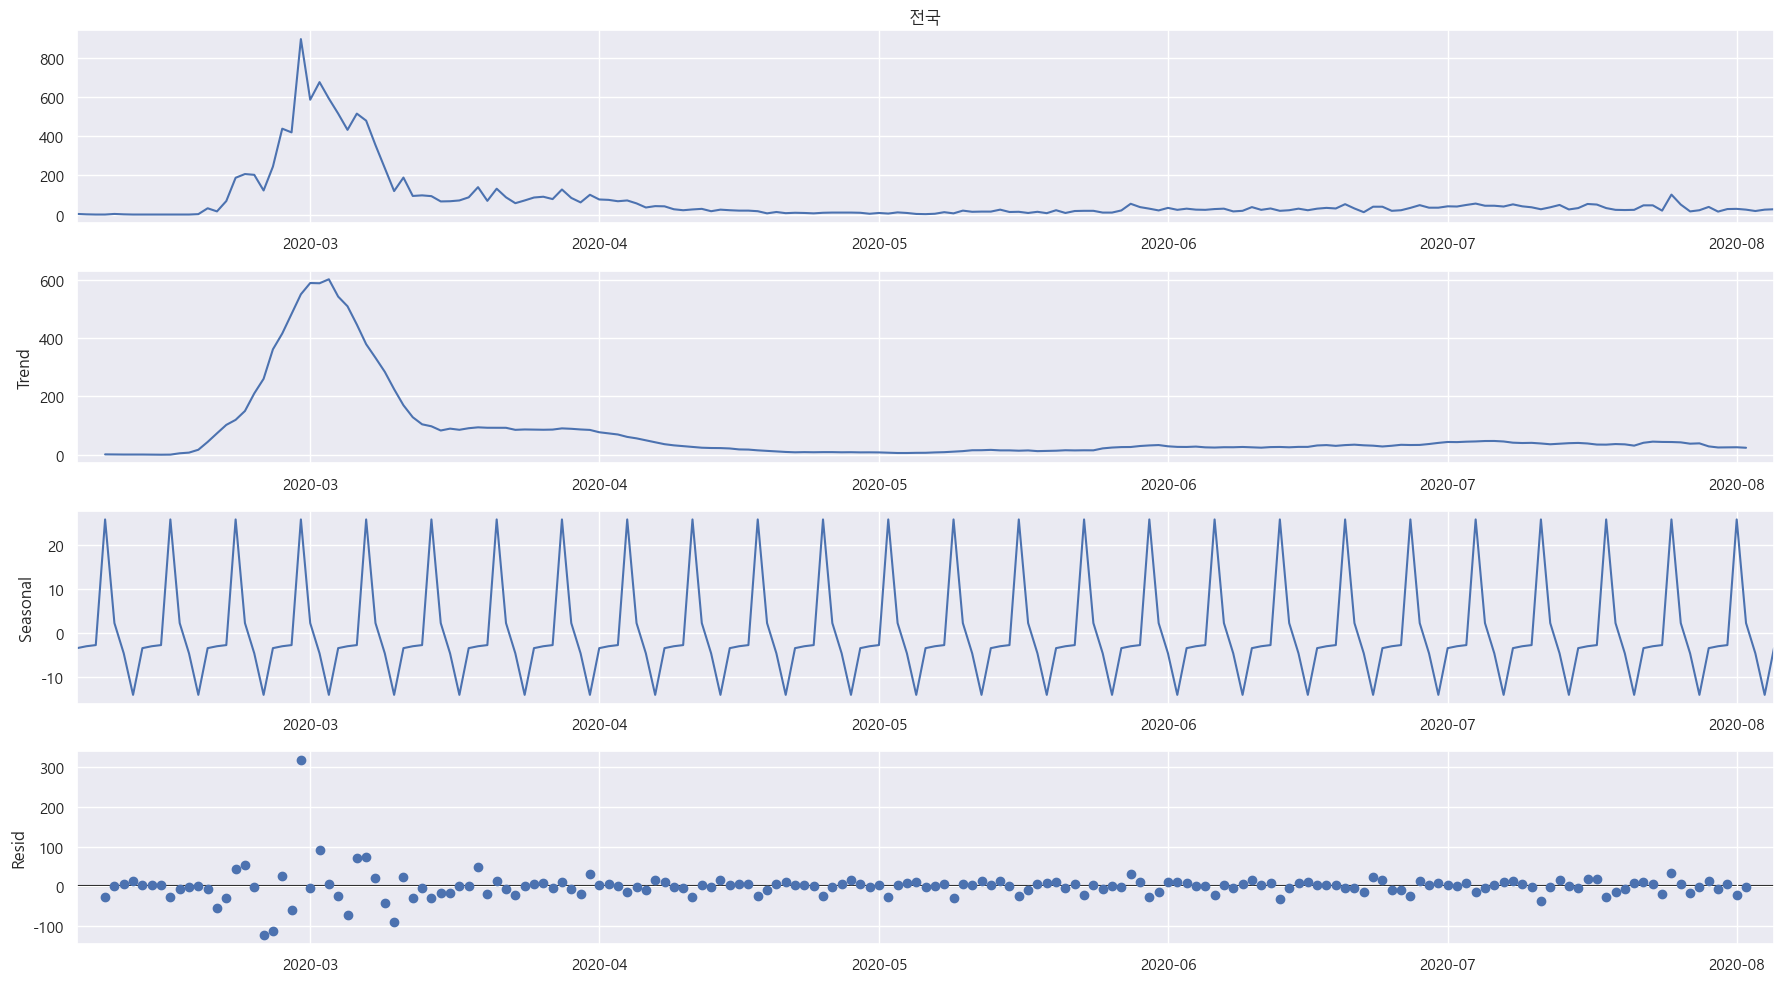

------------------------------------------------------------------------------------------------------------------------------------------


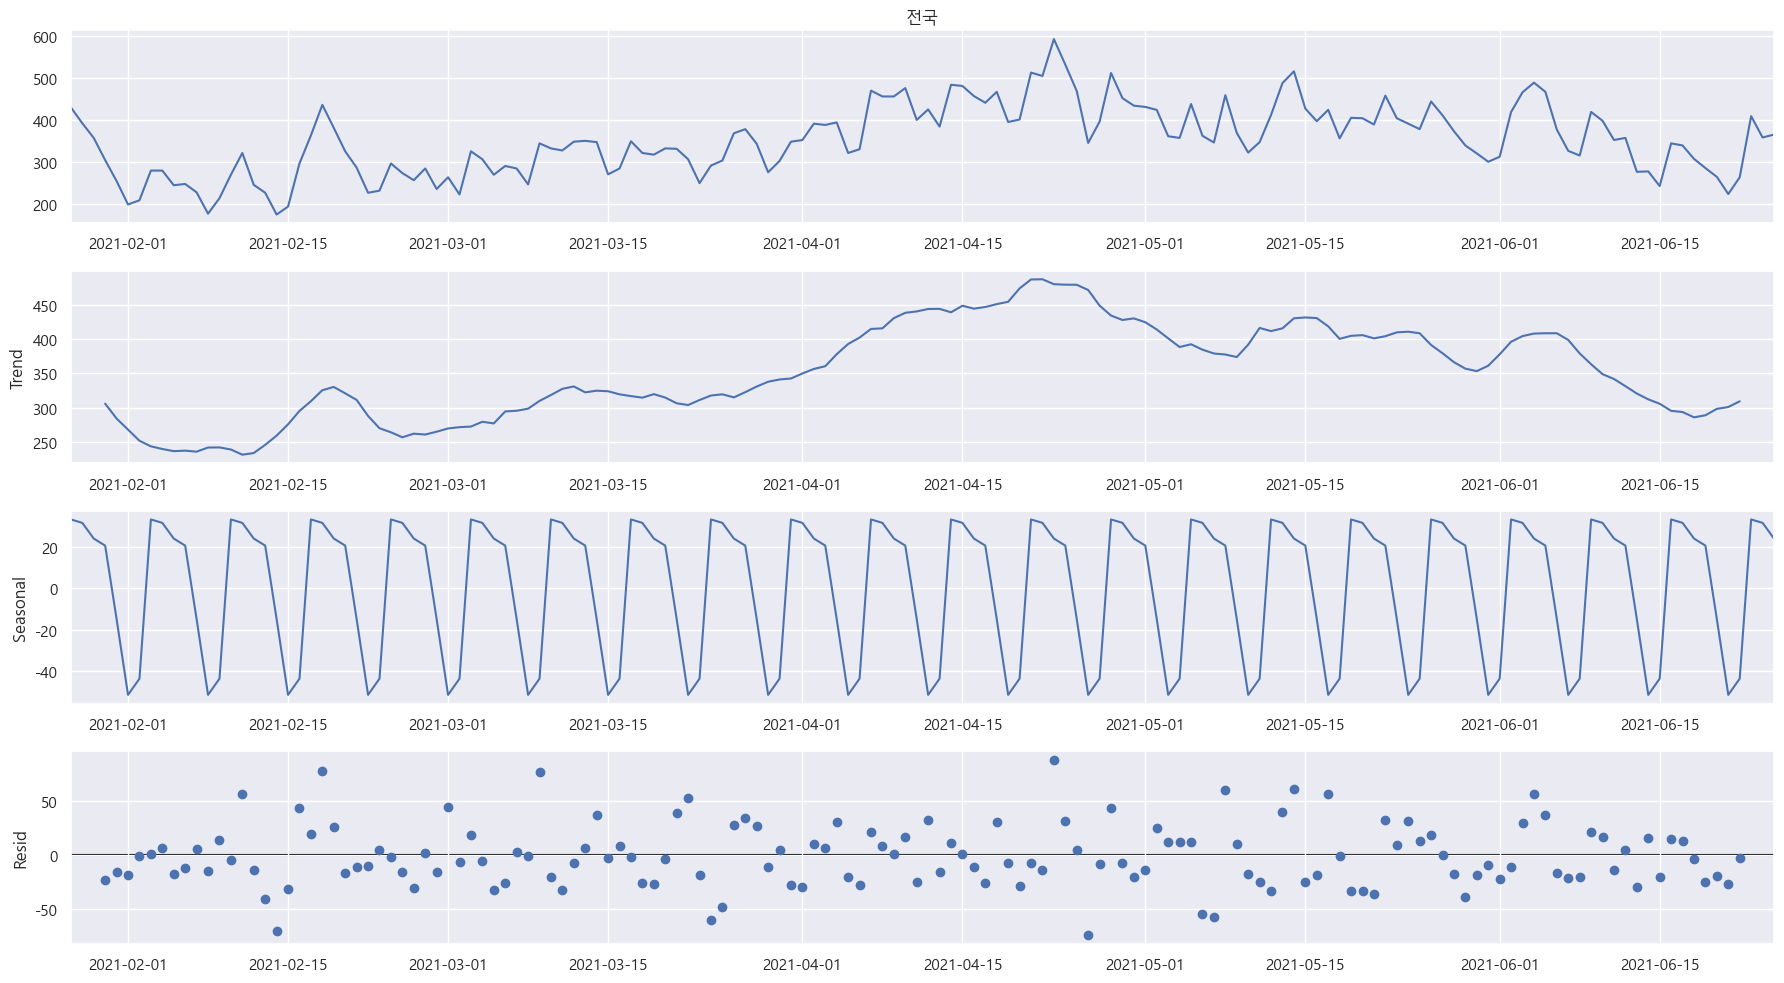

------------------------------------------------------------------------------------------------------------------------------------------


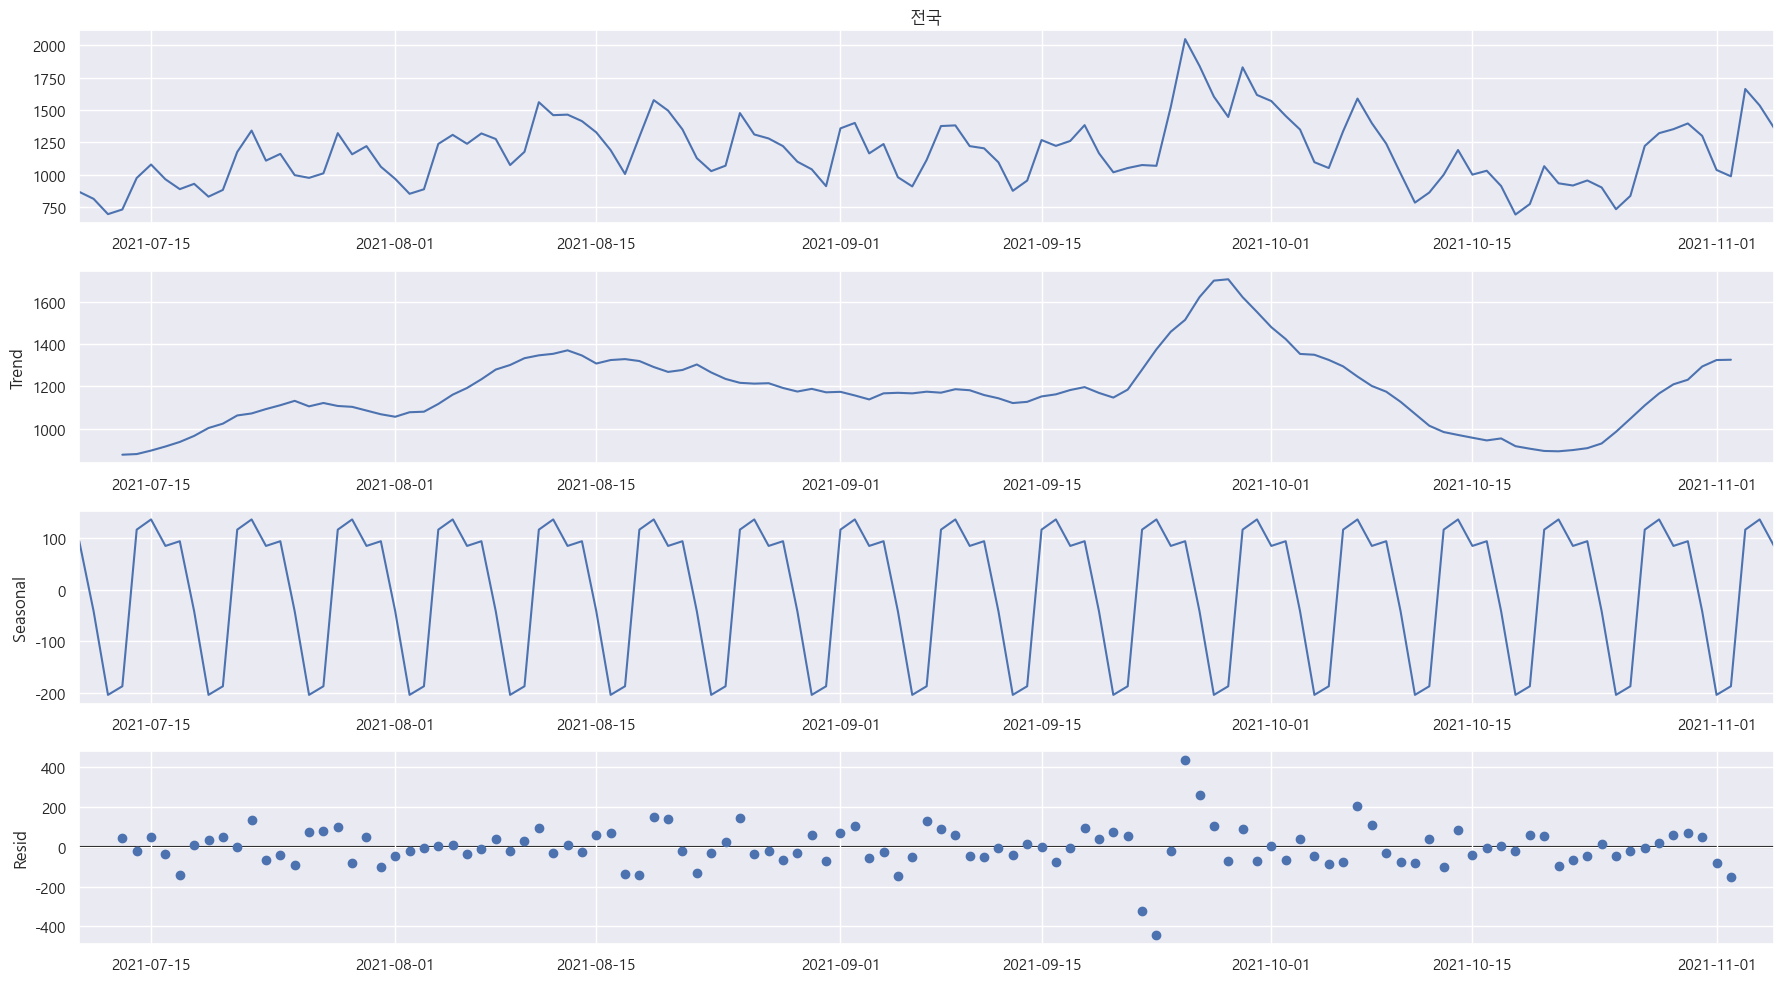

------------------------------------------------------------------------------------------------------------------------------------------


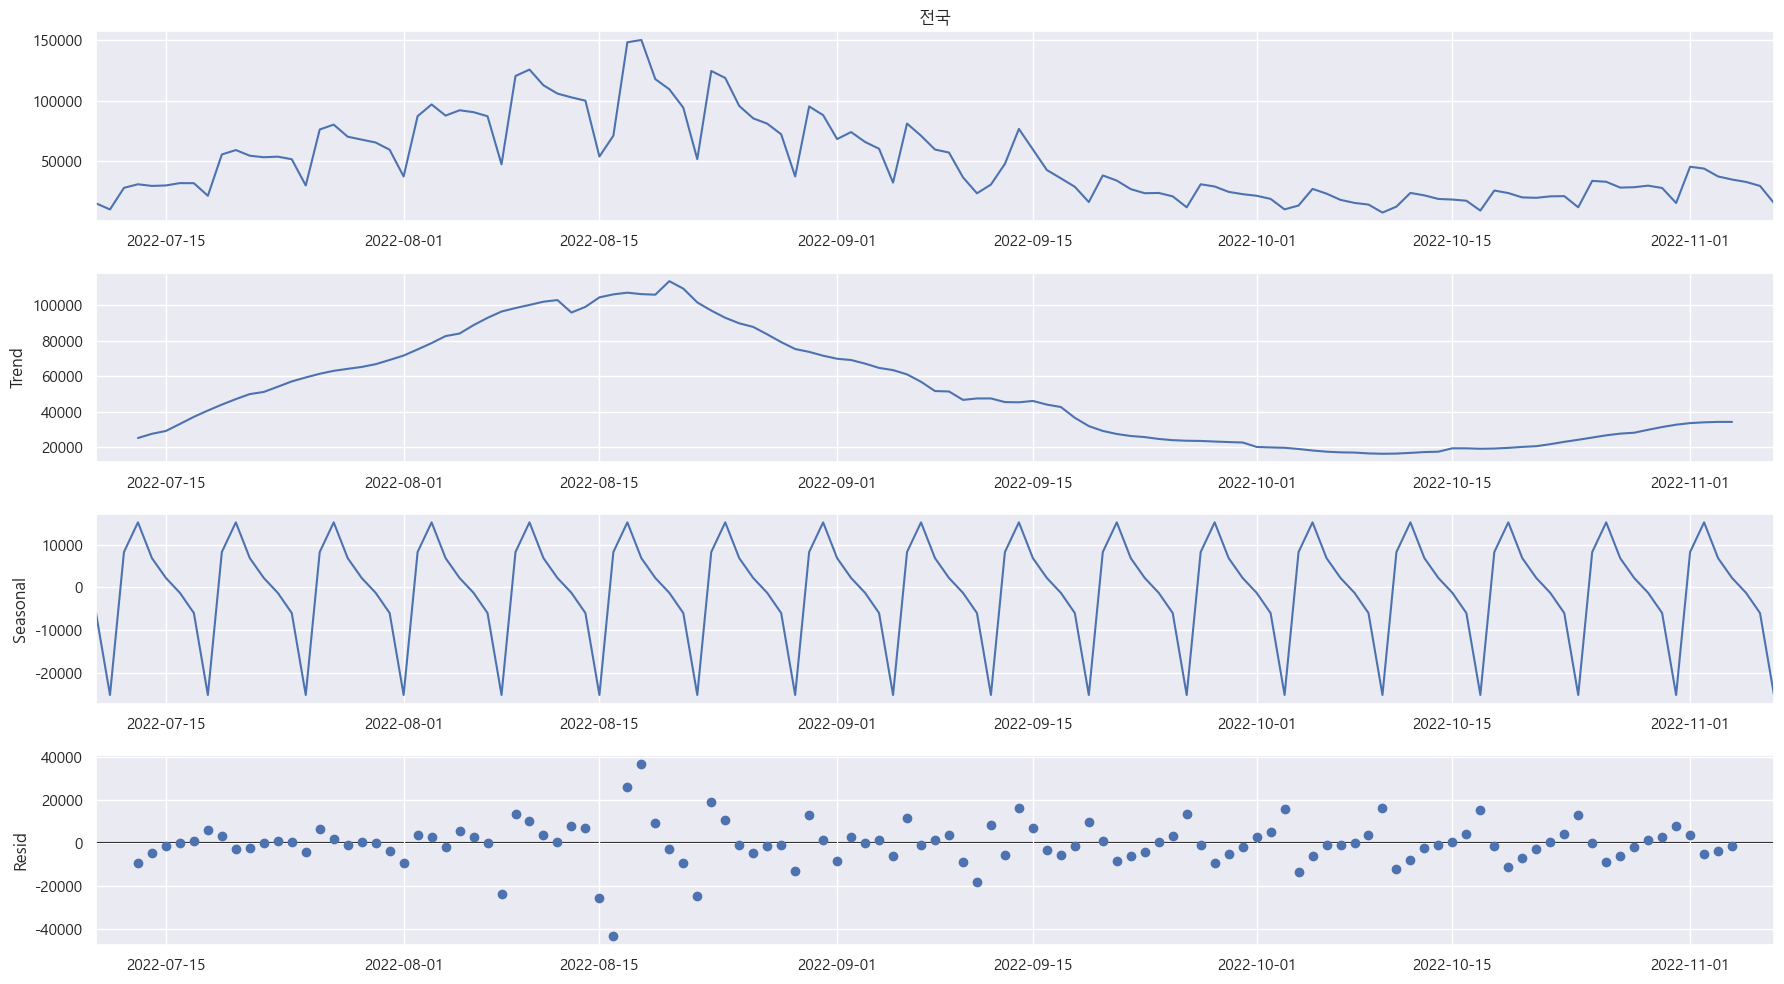

------------------------------------------------------------------------------------------------------------------------------------------


In [719]:
get_trend('전국')

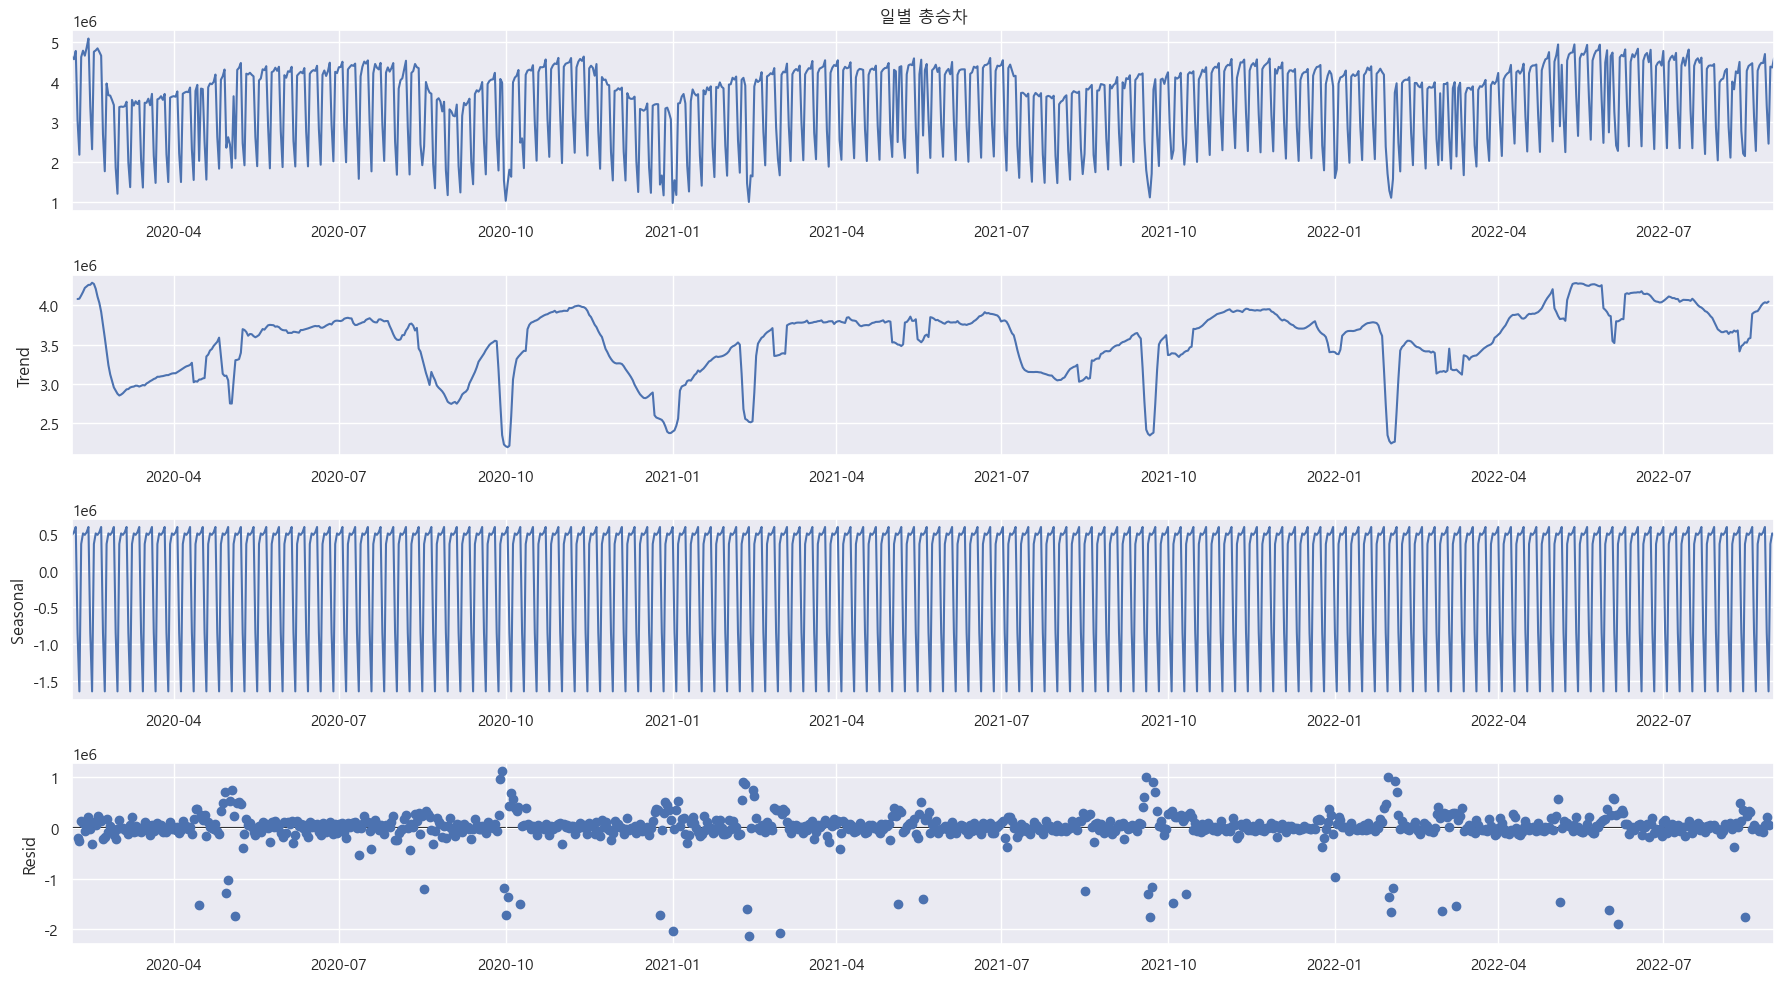

In [777]:
df_trend = dataset_total[dataset_total['date'] <= '2022-08-31']
df_pivot = pd.pivot_table(data=df_trend, index='date', values='일별 총승차', aggfunc='mean')
df_y = df_pivot['일별 총승차'].resample('1D').mean()

# 시계열 모델 생성
model_seires = tsa.seasonal_decompose(df_y, model='additive')
# 모델 시각화
fig = model_seires.plot()
plt.show()

In [224]:
import os
import datetime
from datetime import datetime

# Arima 모델 패키지
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Auto ARIMA
# pip install --user pmdarima


# XGBoost 모델로 함수 생성

In [297]:
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier

In [485]:
def get_result(date_1_start, date_1_end, split):
    df1 = dataset_total[(dataset_total['date'] >= date_1_start) & (dataset_total['date'] <= date_1_end)][['date', '서울']]
    df1 = df1.set_index('date')
    df1['month'] = df1.index.month
    df1['year'] = df1.index.year
    df1['dayofweek'] = df1.index.dayofweek
    df1_train = df1[:split]
    df1_test = df1[split:]
    
    X_train = df1_train.drop('서울', axis=1)
    y_train = df1_train.loc[:,'서울']
    X_test = df1_test.drop('서울', axis=1)
    y_test = df1_test.loc[:,'서울']

    df1_test_orig = df1_test.loc[:,['서울']]
    
    XG_model_month = xgb.XGBRegressor(n_estimators=300)
    XG_model_month.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False)
    
    plot_importance(XG_model_month, height=0.9)
    
    xgboost = XG_model_month.predict(X_test)

    # 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
    xgb_df1 = pd.DataFrame(xgboost, columns=['xgboost'])
    df1_result = df1_test_orig.reset_index()
    result = df1_result.join(xgb_df1, how='left')
    result = result1.set_index('date')
    print(mean_squared_error(y_test, xgboost))
    result1.plot()

# 1구간

21.554068341385126


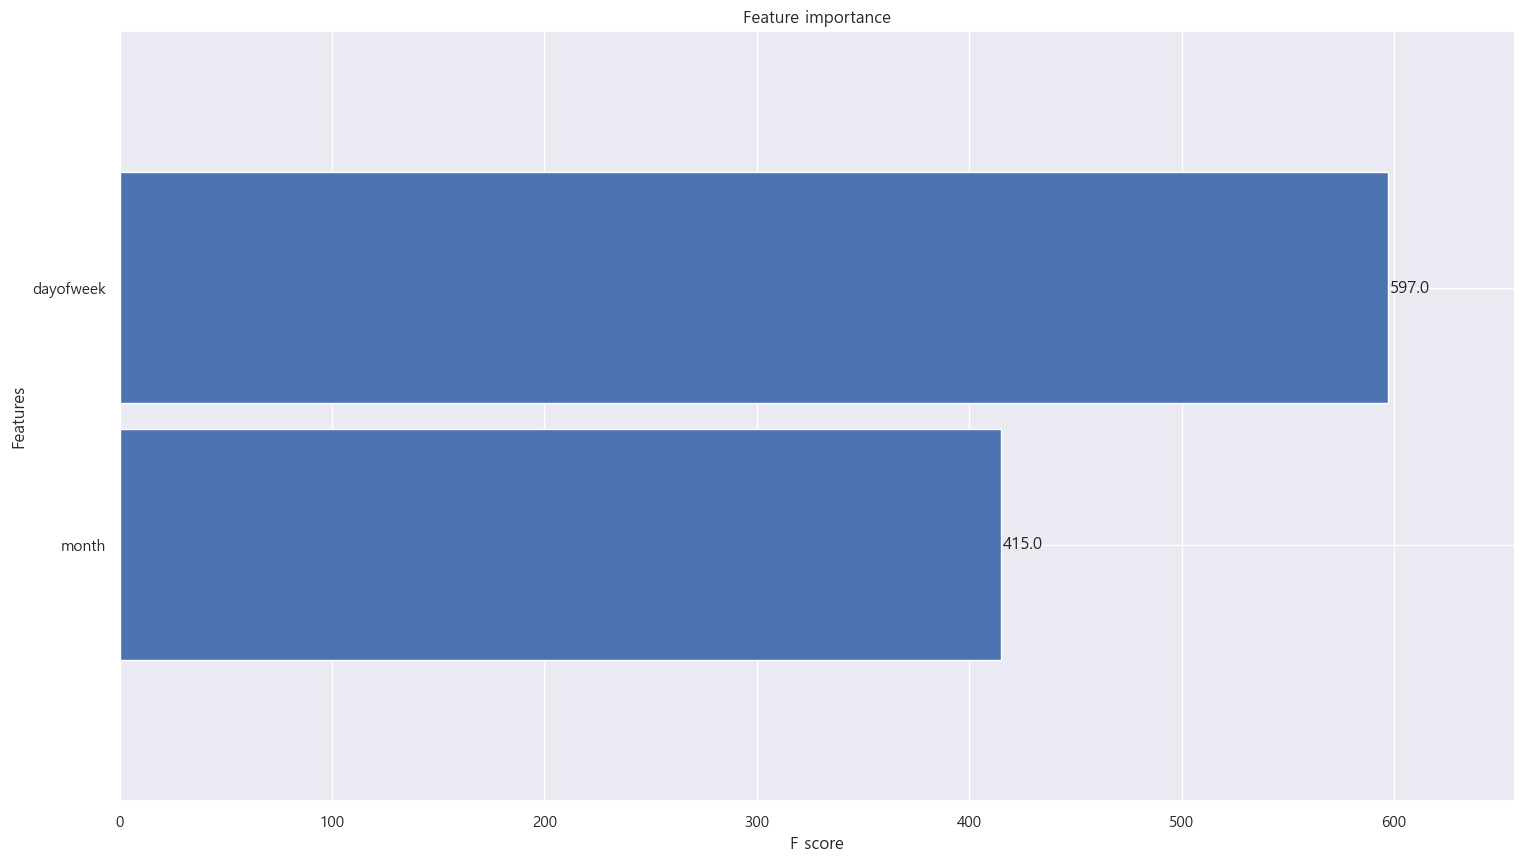

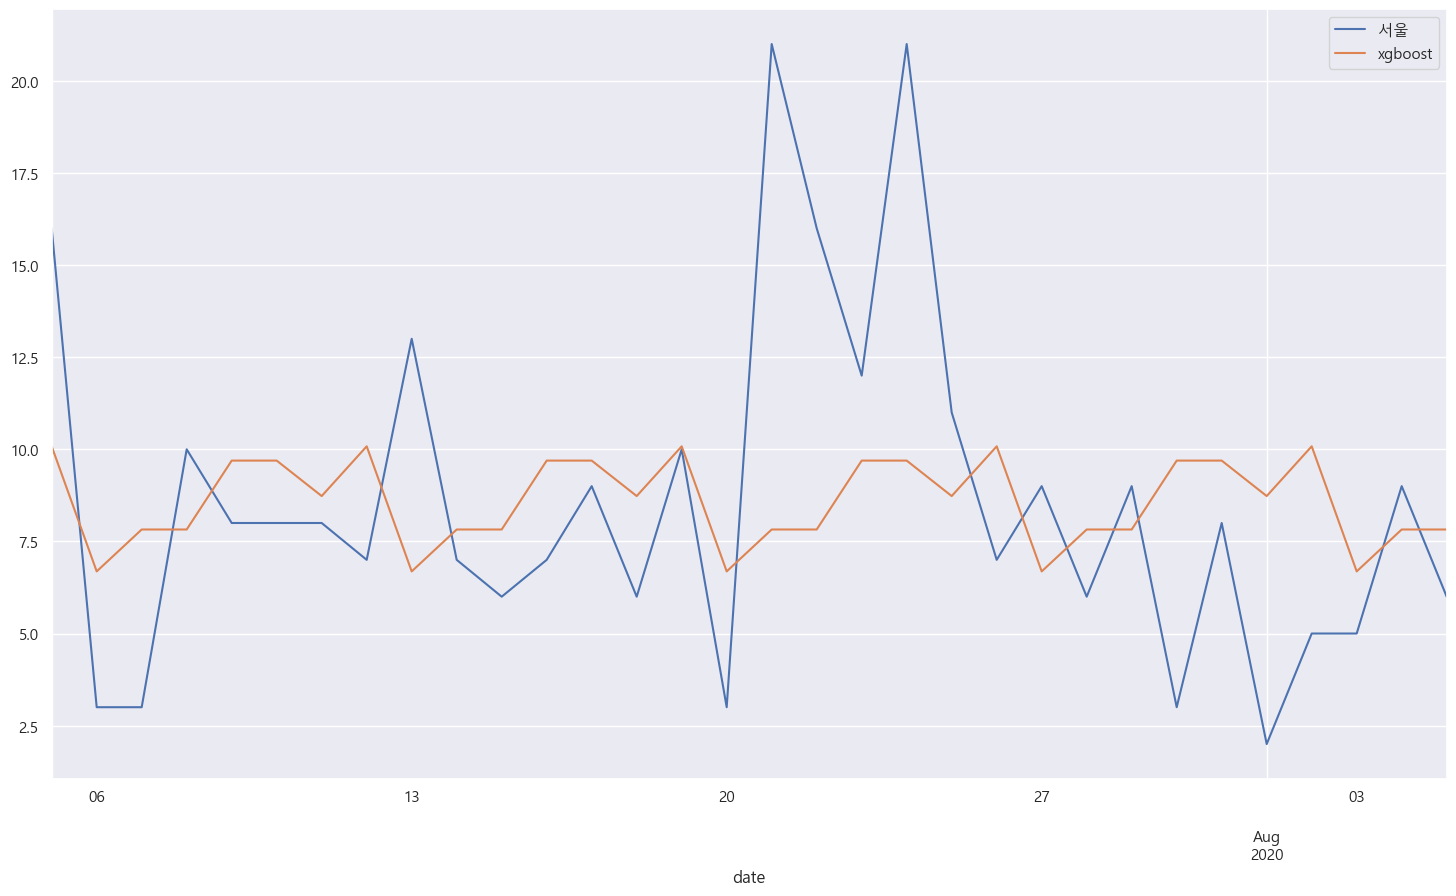

In [635]:
get_result(date_1_start, date_1_end, split='2020-07-05')

# 2구간

688.4940658467563


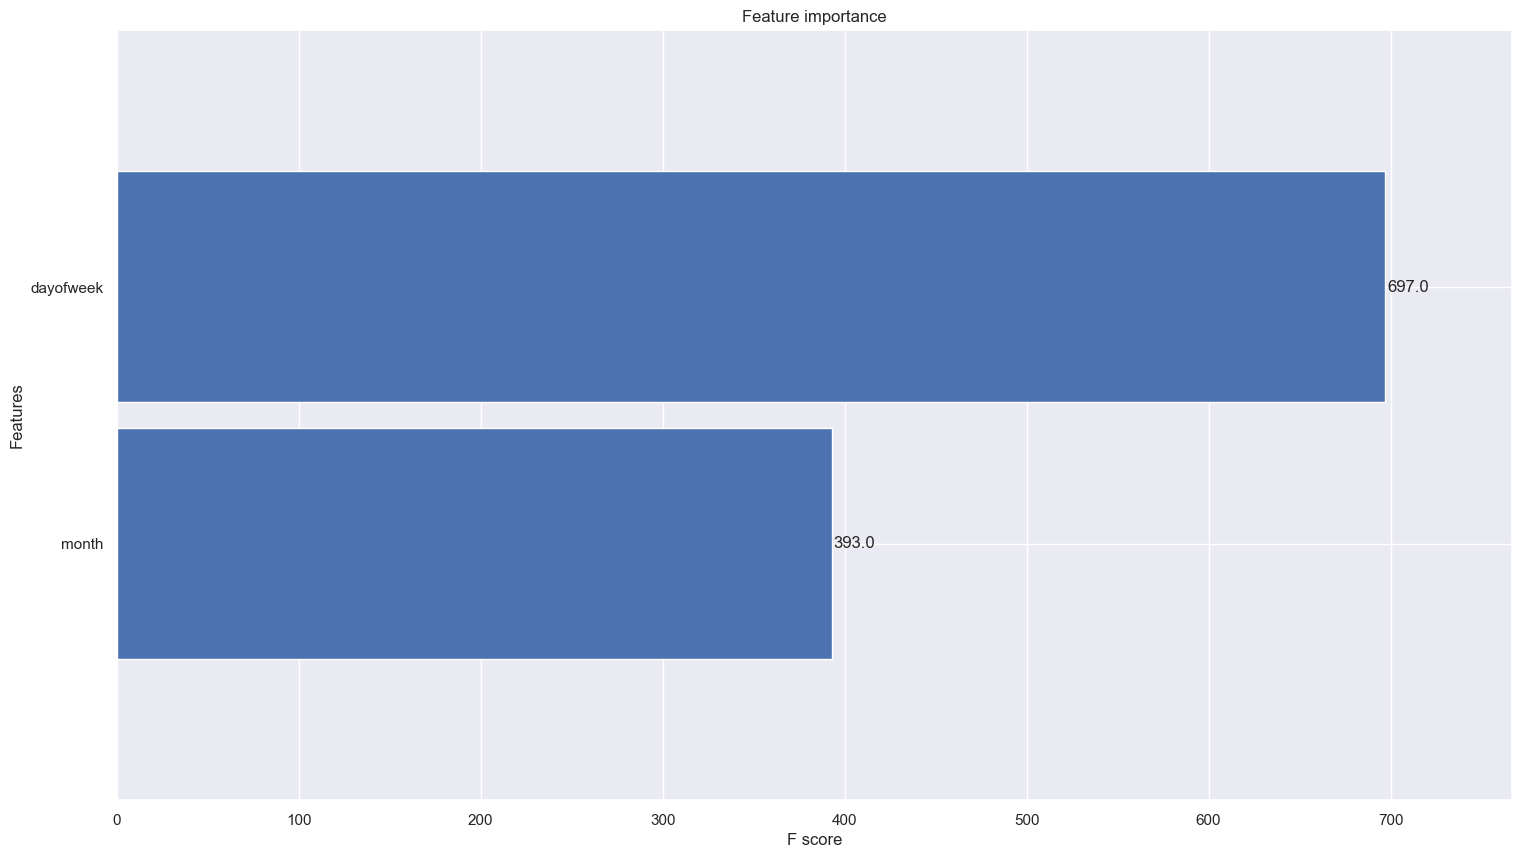

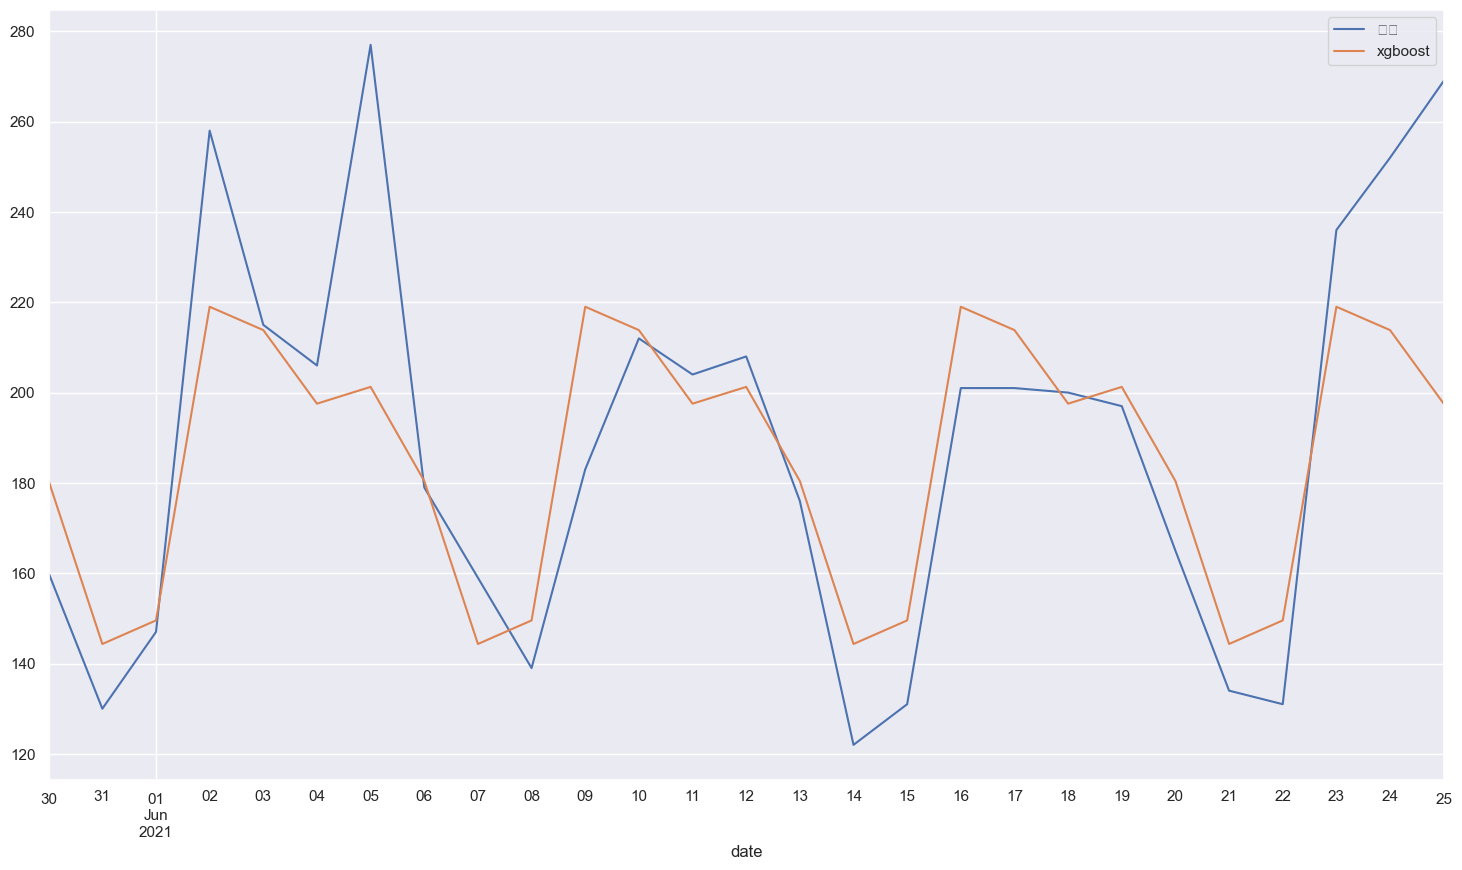

In [489]:
get_result(date_2_start, date_2_end, split='2021-05-30')

# 3구간

24917.13325561782


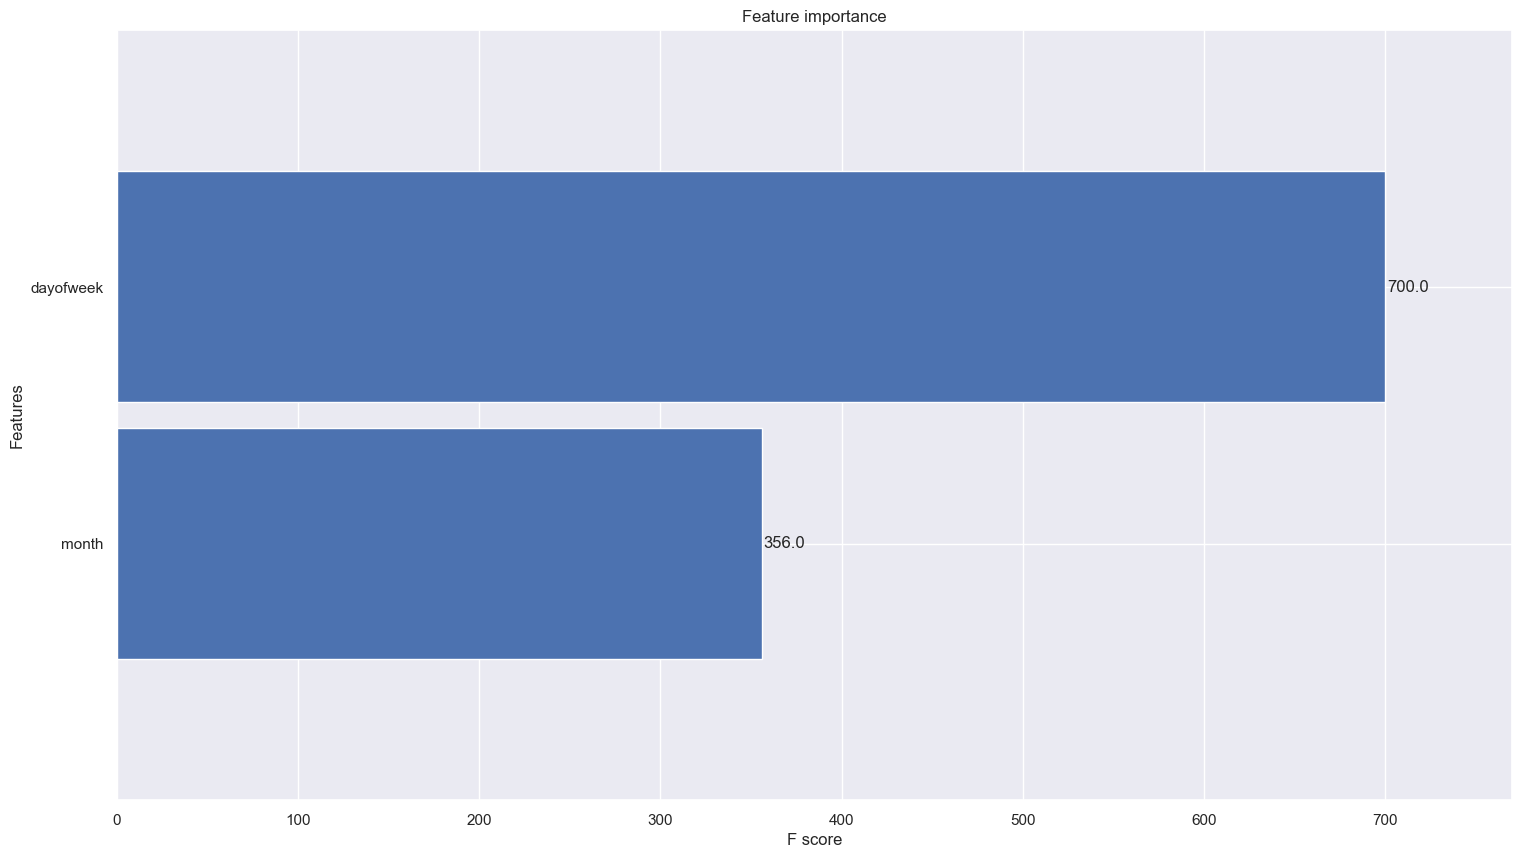

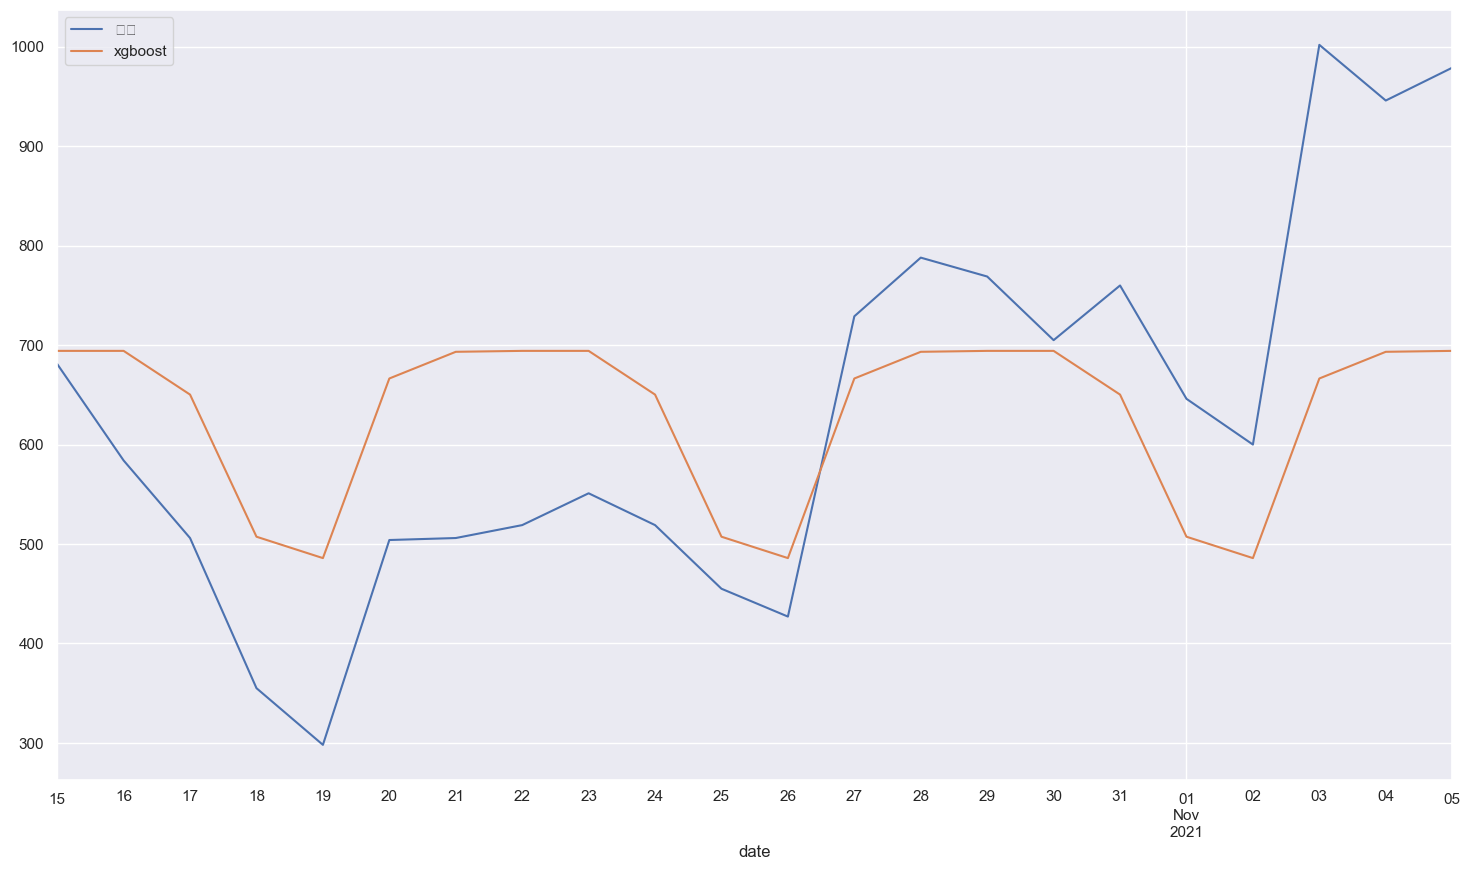

In [490]:
get_result(date_3_start, date_3_end, '2021-10-15')

# 4구간

33783196.23647042


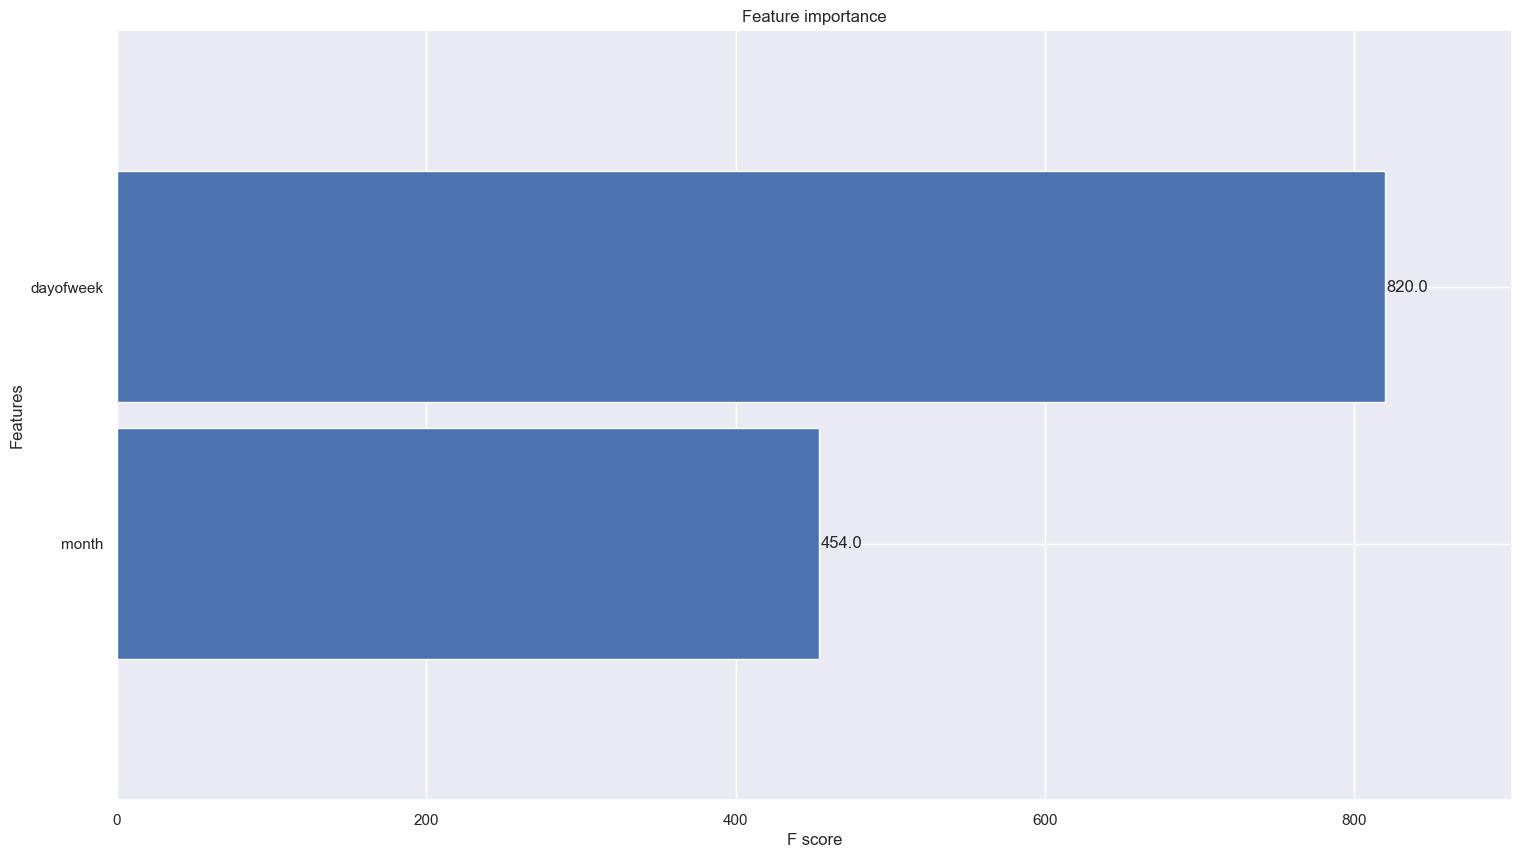

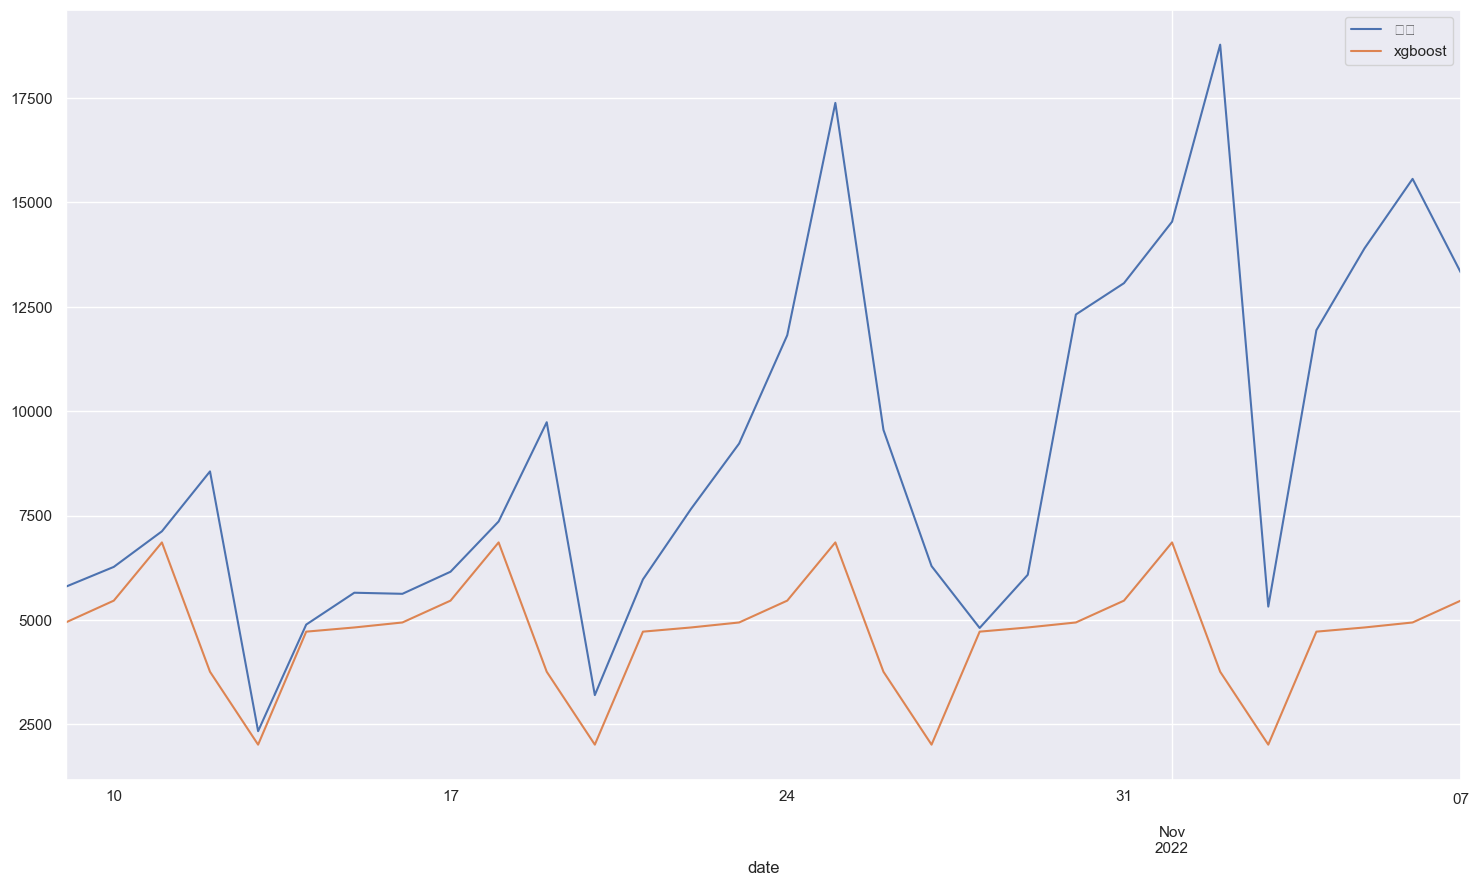

In [491]:
get_result(date_4_start, date_4_end, '2022-10-09')

# 4구간 모델로 23년도 1월까지 예측

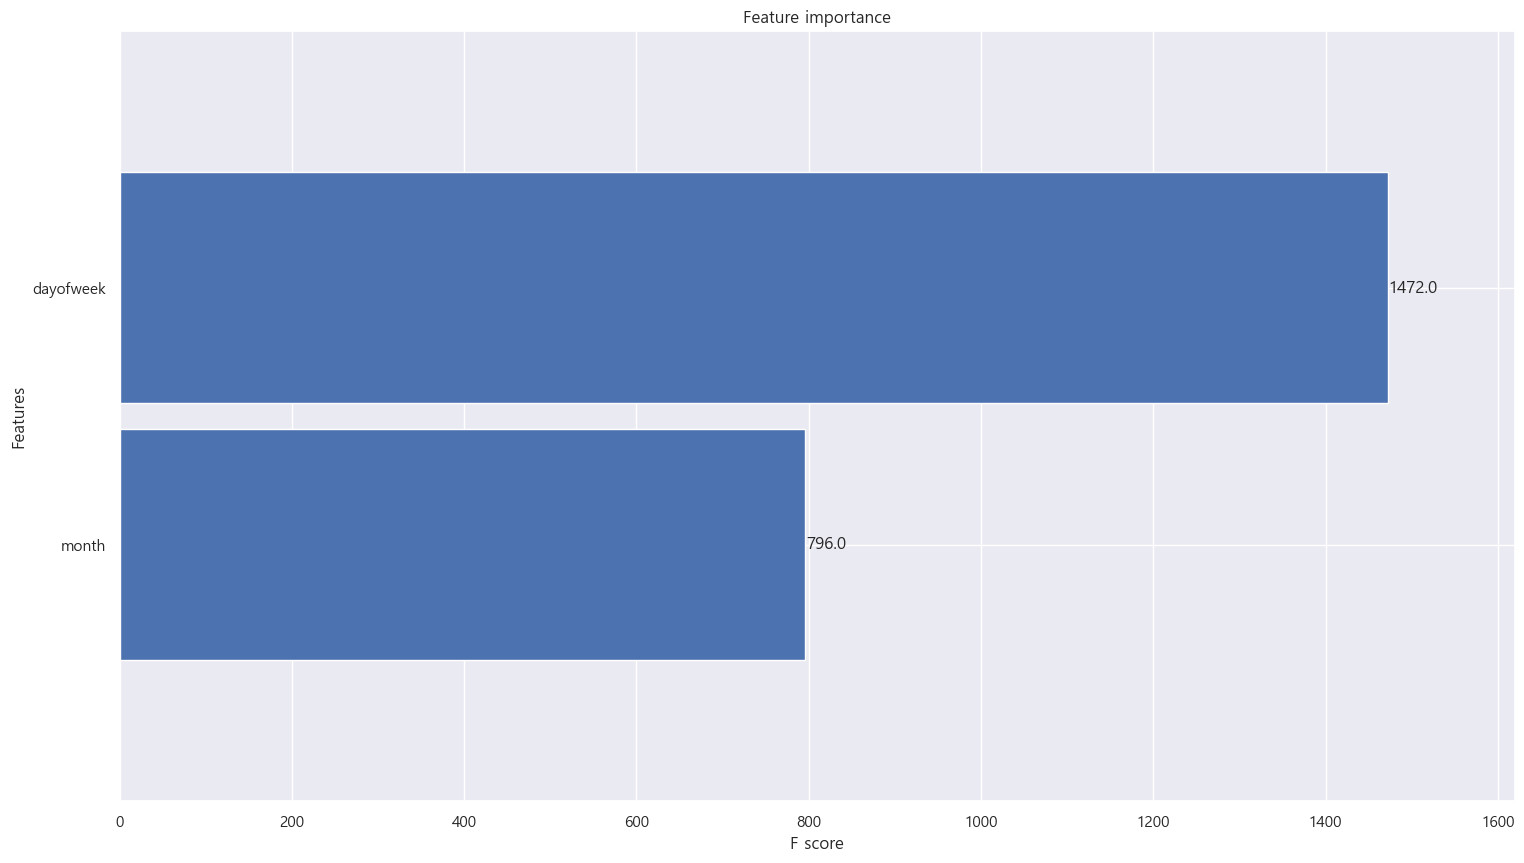

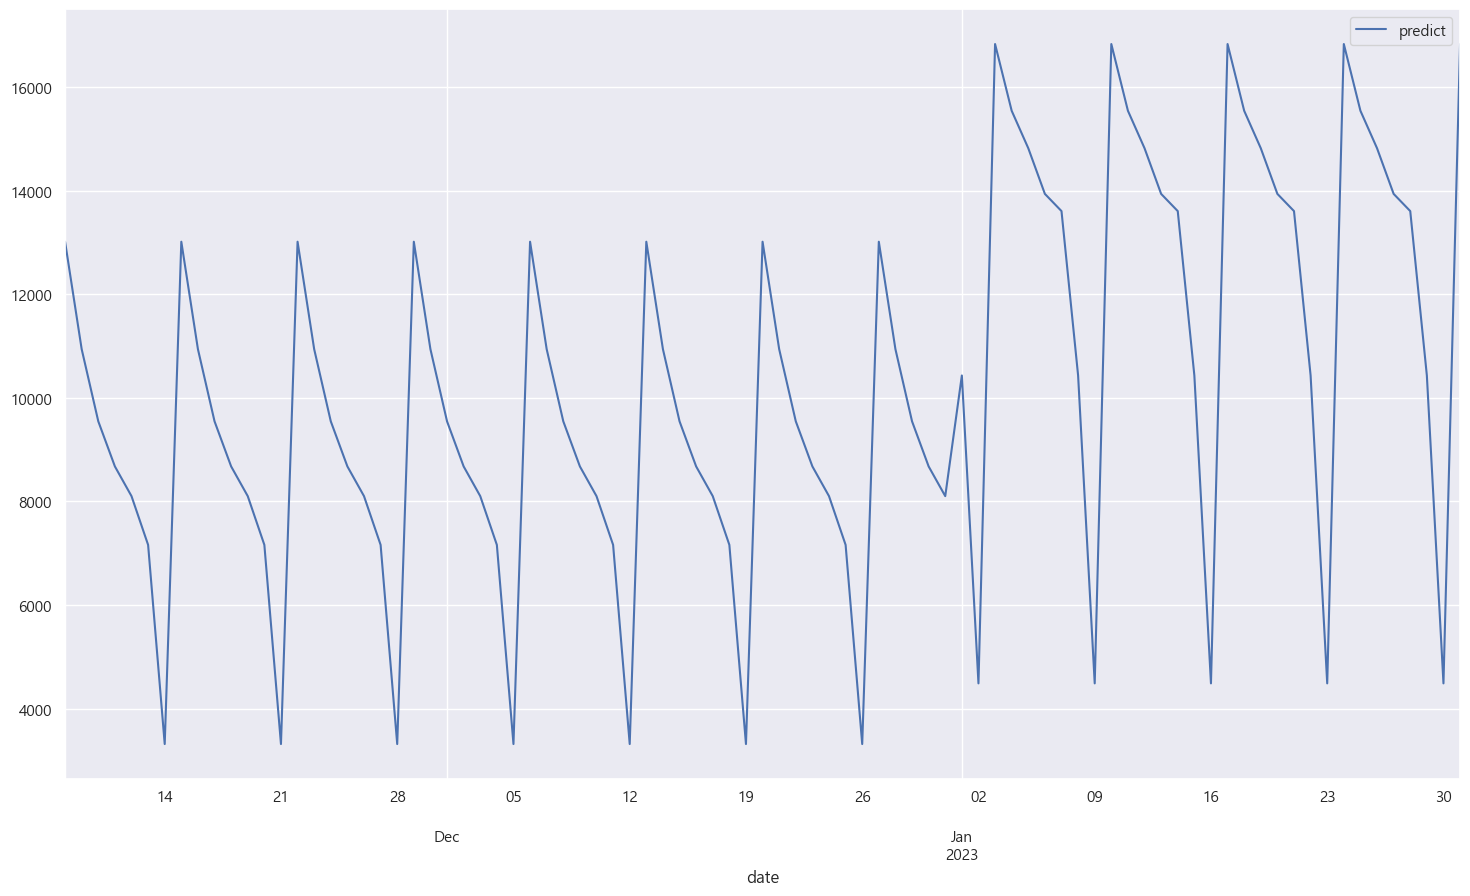

In [628]:
a = '서울'
date=date_4_start

result = get_make(date, a)
result.to_excel('서울시 코로나 확진자 예측.xlsx', index=None)

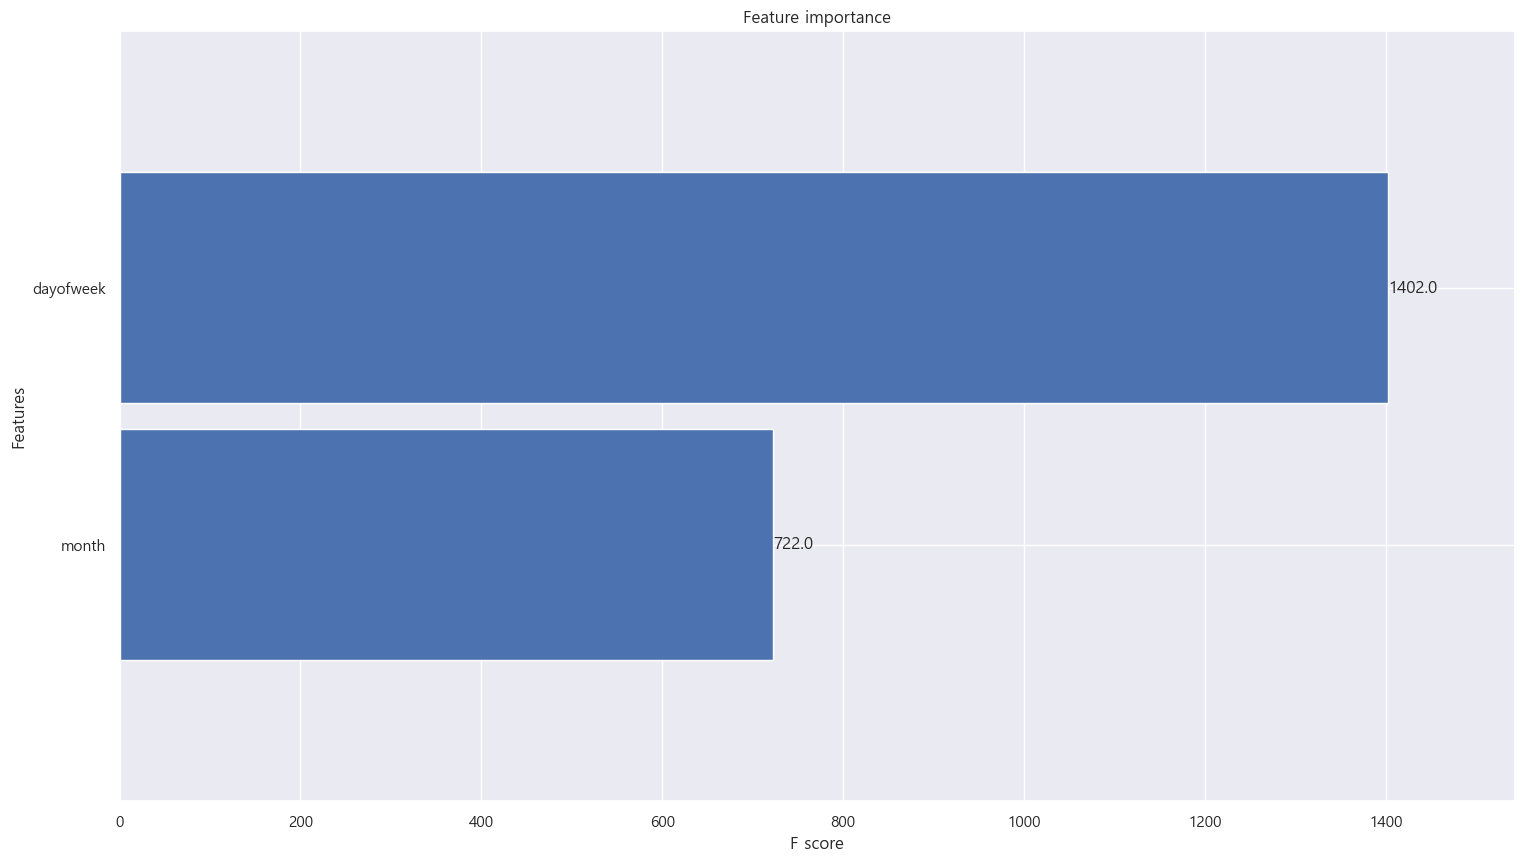

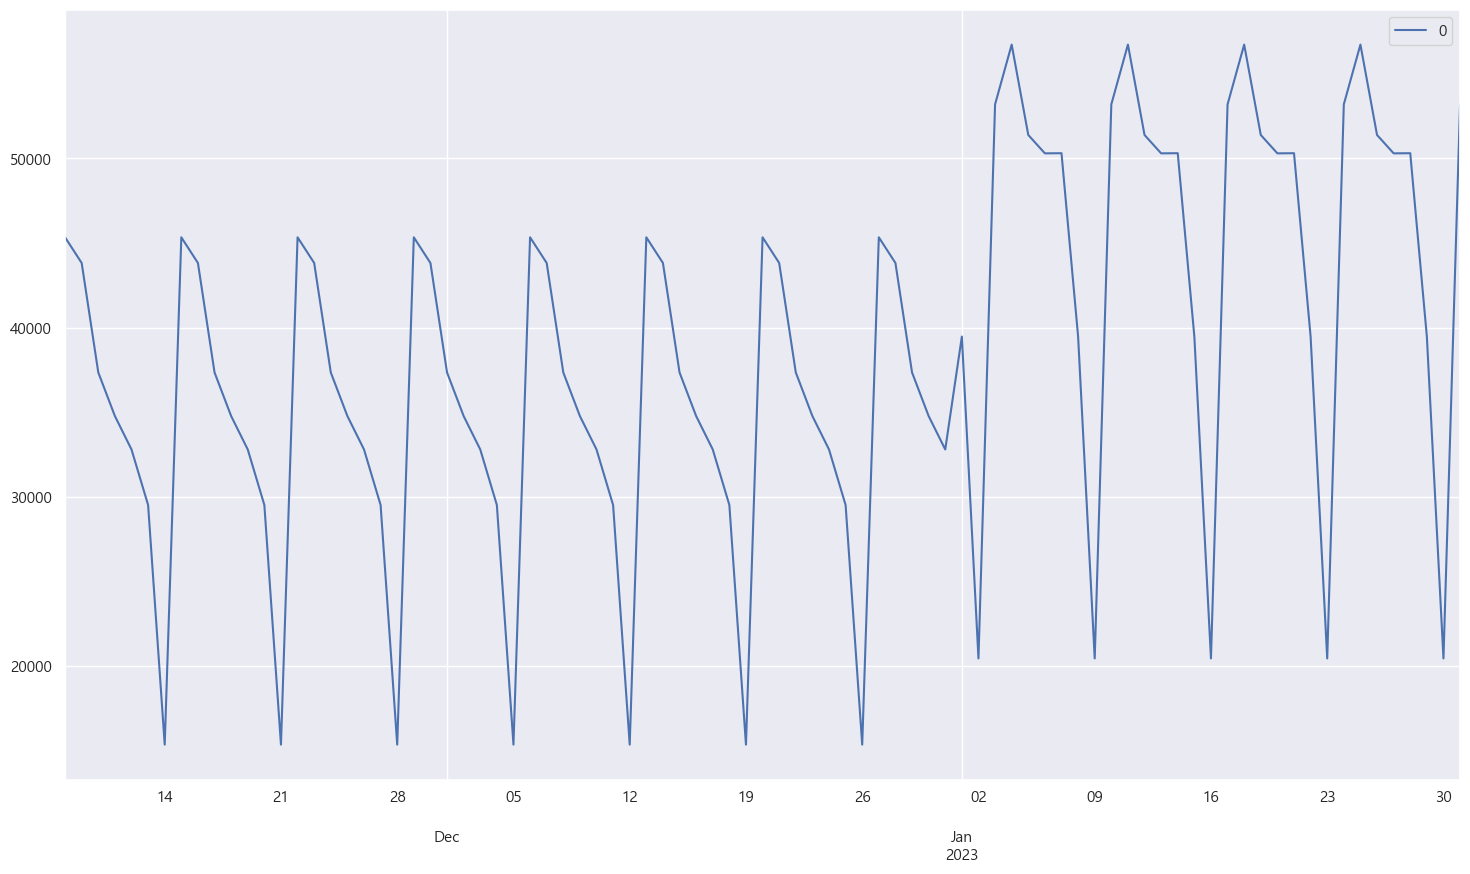

In [750]:
df_re = dataset_total[(dataset_total['date'] <= '2022-11-07') & (dataset_total['date'] >= '2022-07-10')][['date', '전국']]
df_re.set_index('date', inplace=True)
df_re['month'] = df_re.index.month
df_re['year'] = df_re.index.year
df_re['dayofweek'] = df_re.index.dayofweek

y = df_re.loc[:, '전국']
X = df_re.drop('전국', axis=1)

XG_model_month = xgb.XGBRegressor(n_estimators=300)
XG_model_month.fit(X, y, eval_set=[(X, y)], early_stopping_rounds=50,verbose=False)
    
plot_importance(XG_model_month, height=0.9)
    
future = pd.date_range(start='2022-11-08', end='2023-01-31')
df_future = pd.DataFrame(future)
df_future.set_index(0,inplace=True)
df_future['month'] = df_future.index.month
df_future['year'] = df_future.index.year
df_future['dayofweek'] = df_future.index.dayofweek

df_pred = XG_model_month.predict(df_future)
df_pred = pd.DataFrame(df_pred, index=future)
df_pred.plot()

df_pred.to_excel('전국-서울 코로나 확진자 데이터.xlsx')

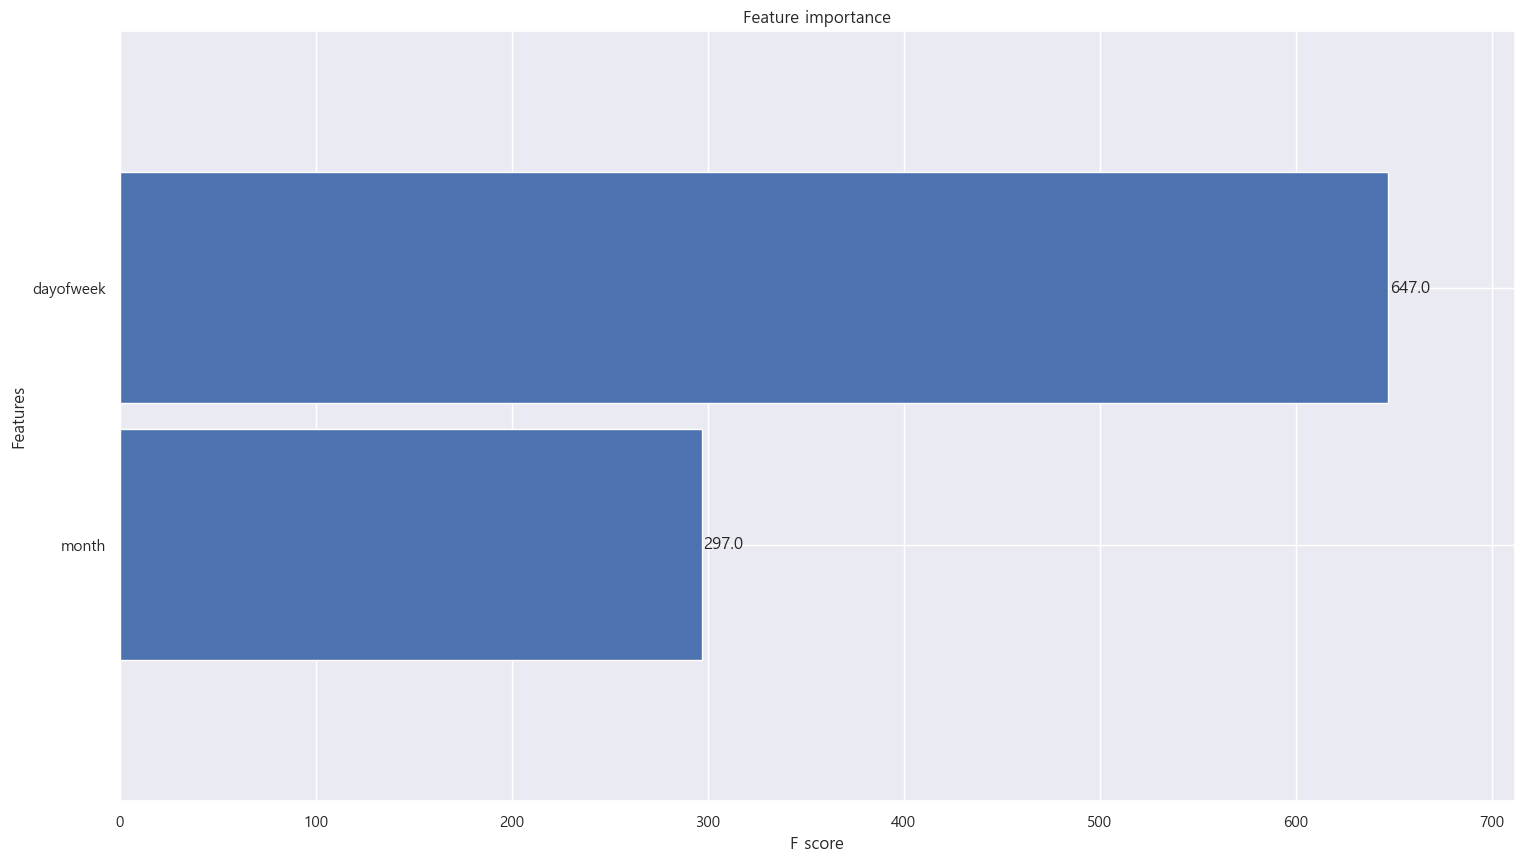

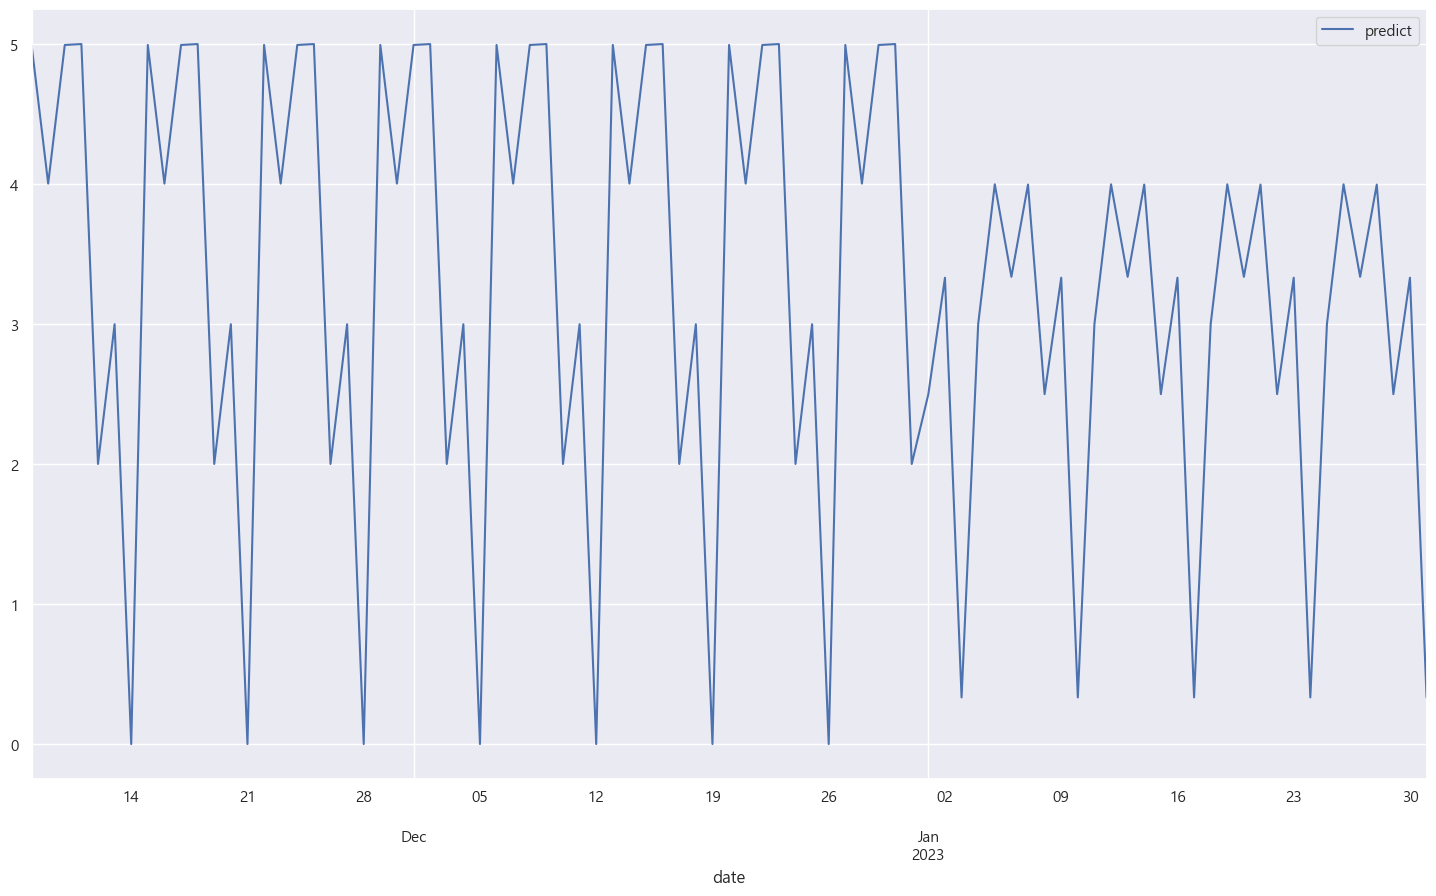

In [630]:
a='서울시 당일사망자'
result = get_make(date_4_start, a)

result.to_excel('서울시 당일사망자 예측 데이터.xlsx', index=True)

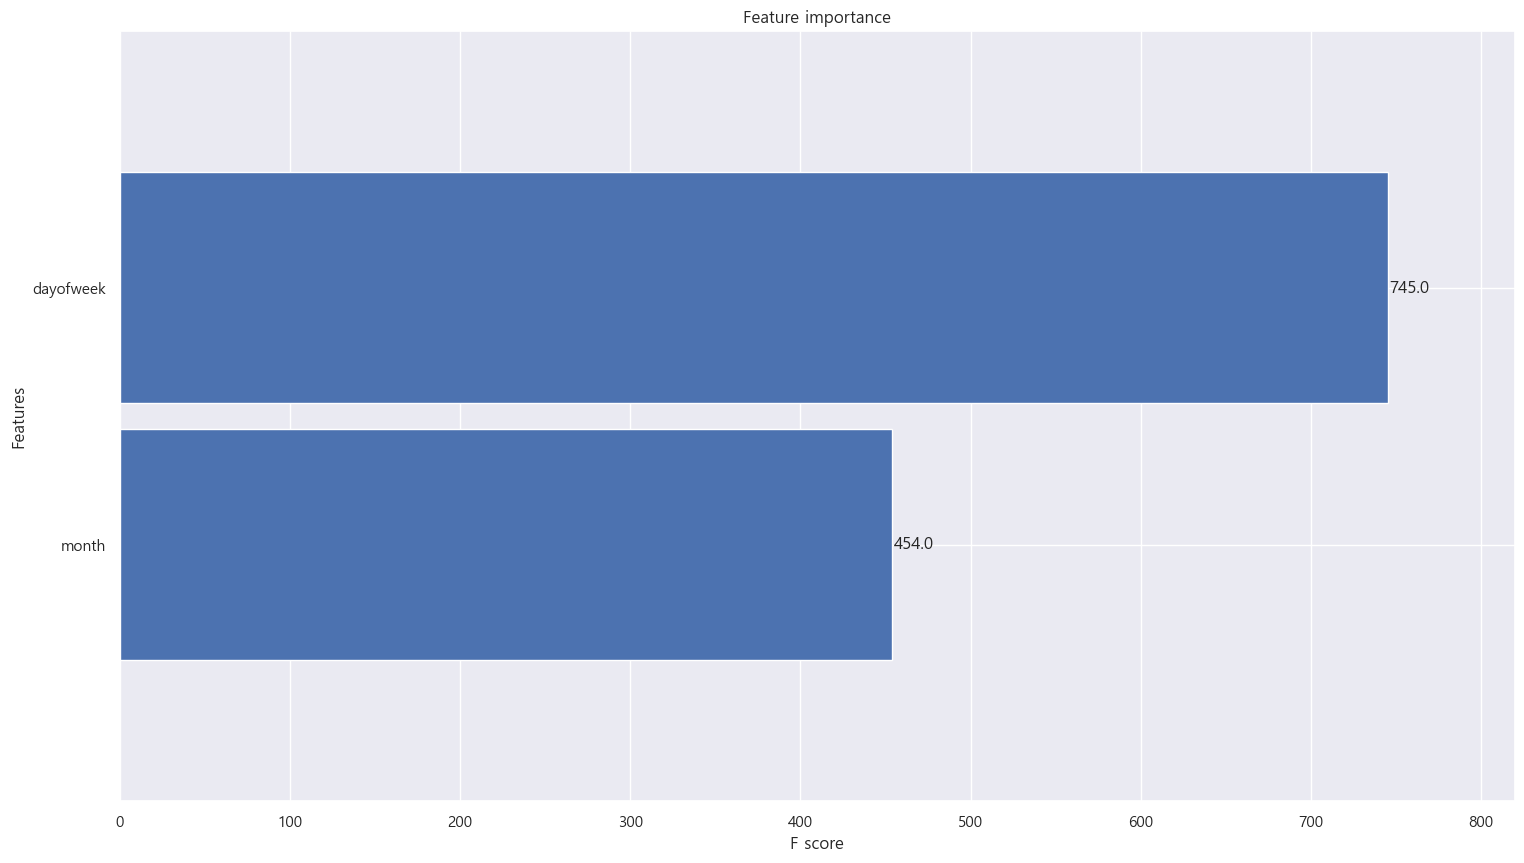

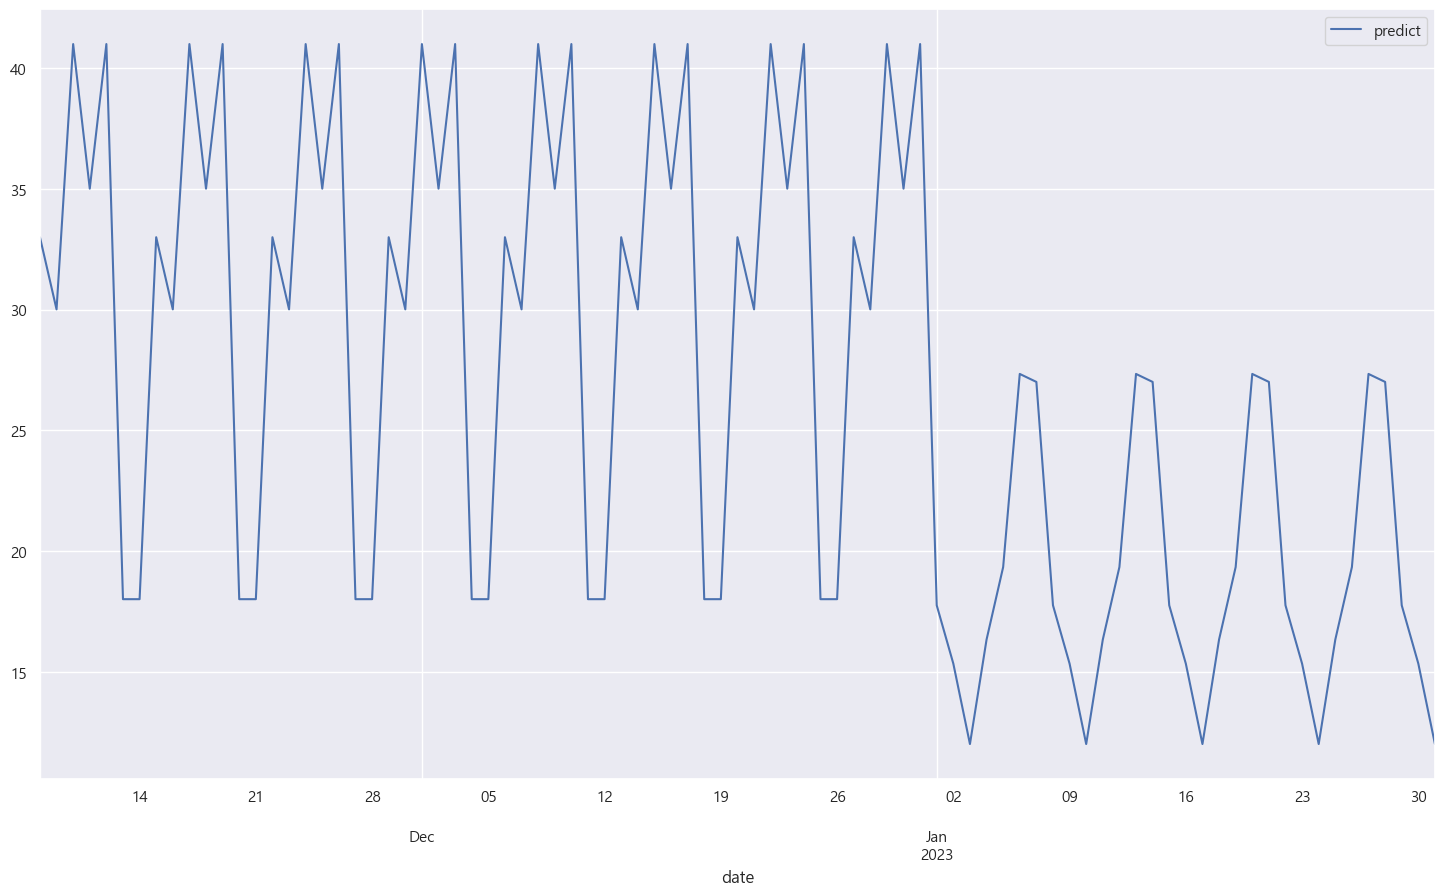

In [631]:
a='전국 당일 사망자'
result = get_make(date_4_start, a)

result.to_excel('전국 당일 사망자 예측 데이터.xlsx', index=None)

# 일별 총승차 시계열

In [537]:
def get_result_total(split):
    df1 = dataset_total[dataset_total['date']<'2022-09-01'][['date', '일별 총승차']]
    df1 = df1.set_index('date')
    df1['month'] = df1.index.month
    df1['year'] = df1.index.year
    df1['dayofweek'] = df1.index.dayofweek
    df1_train = df1[:split]
    df1_test = df1[split:]
    
    X_train = df1_train.drop('일별 총승차', axis=1)
    y_train = df1_train.loc[:,'일별 총승차']
    X_test = df1_test.drop('일별 총승차', axis=1)
    y_test = df1_test.loc[:,'일별 총승차']

    df1_test_orig = df1_test.loc[:,['일별 총승차']]
    
    XG_model_month = xgb.XGBRegressor(n_estimators=300)
    XG_model_month.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False)
    
    plot_importance(XG_model_month, height=0.9)
    
    xgboost = XG_model_month.predict(X_test)

    # 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
    xgb_df1 = pd.DataFrame(xgboost, columns=['xgboost'])
    df1_result = df1_test_orig.reset_index()
    result1 = df1_result.join(xgb_df1, how='left')
    result1 = result1.set_index('date')
    print(mean_squared_error(y_test, xgboost))
    result1.plot()

273927383537.32812


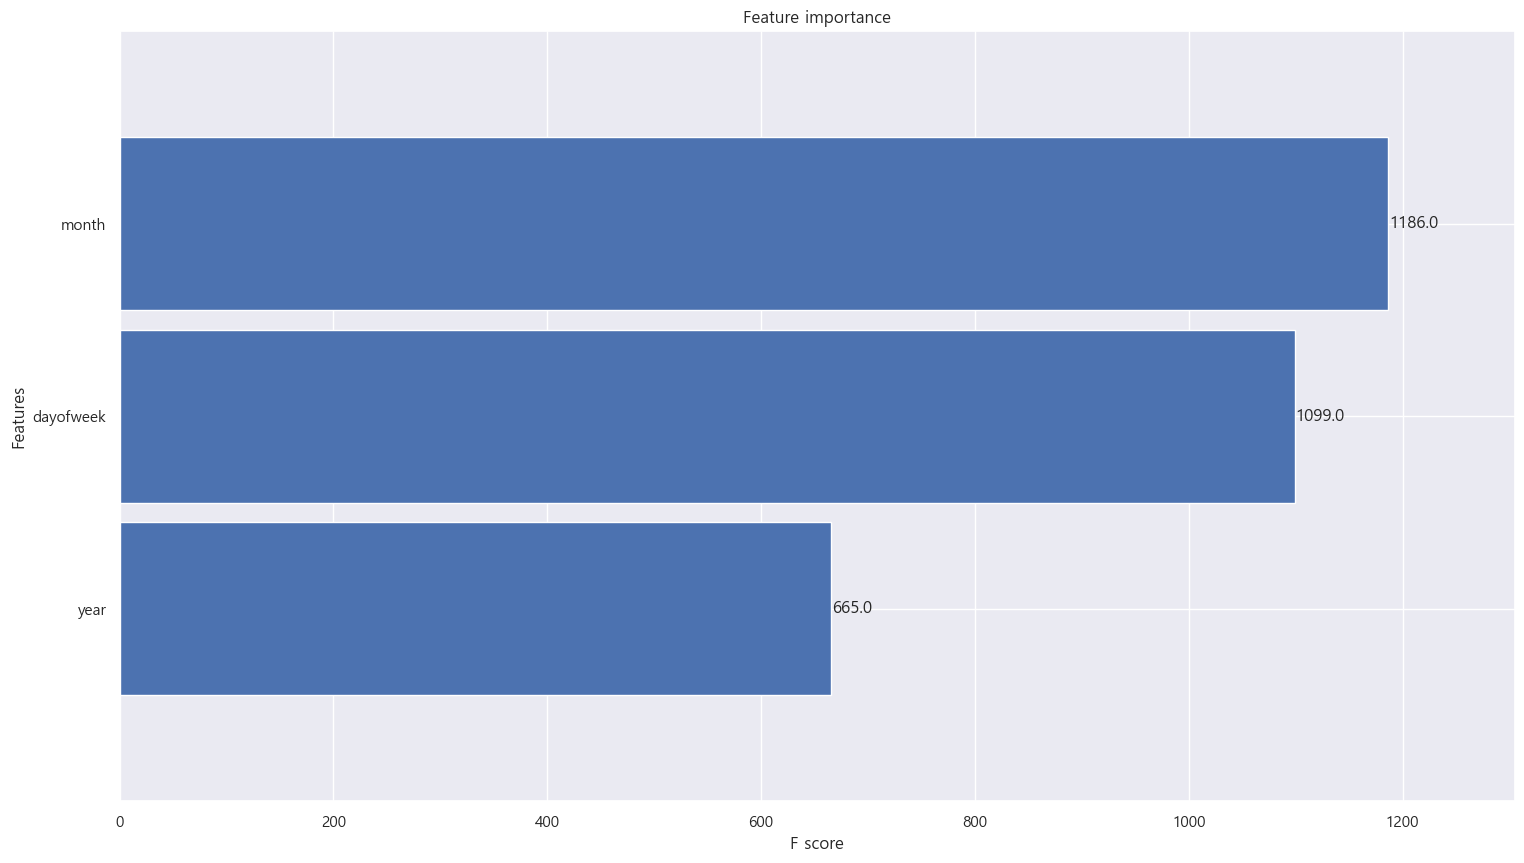

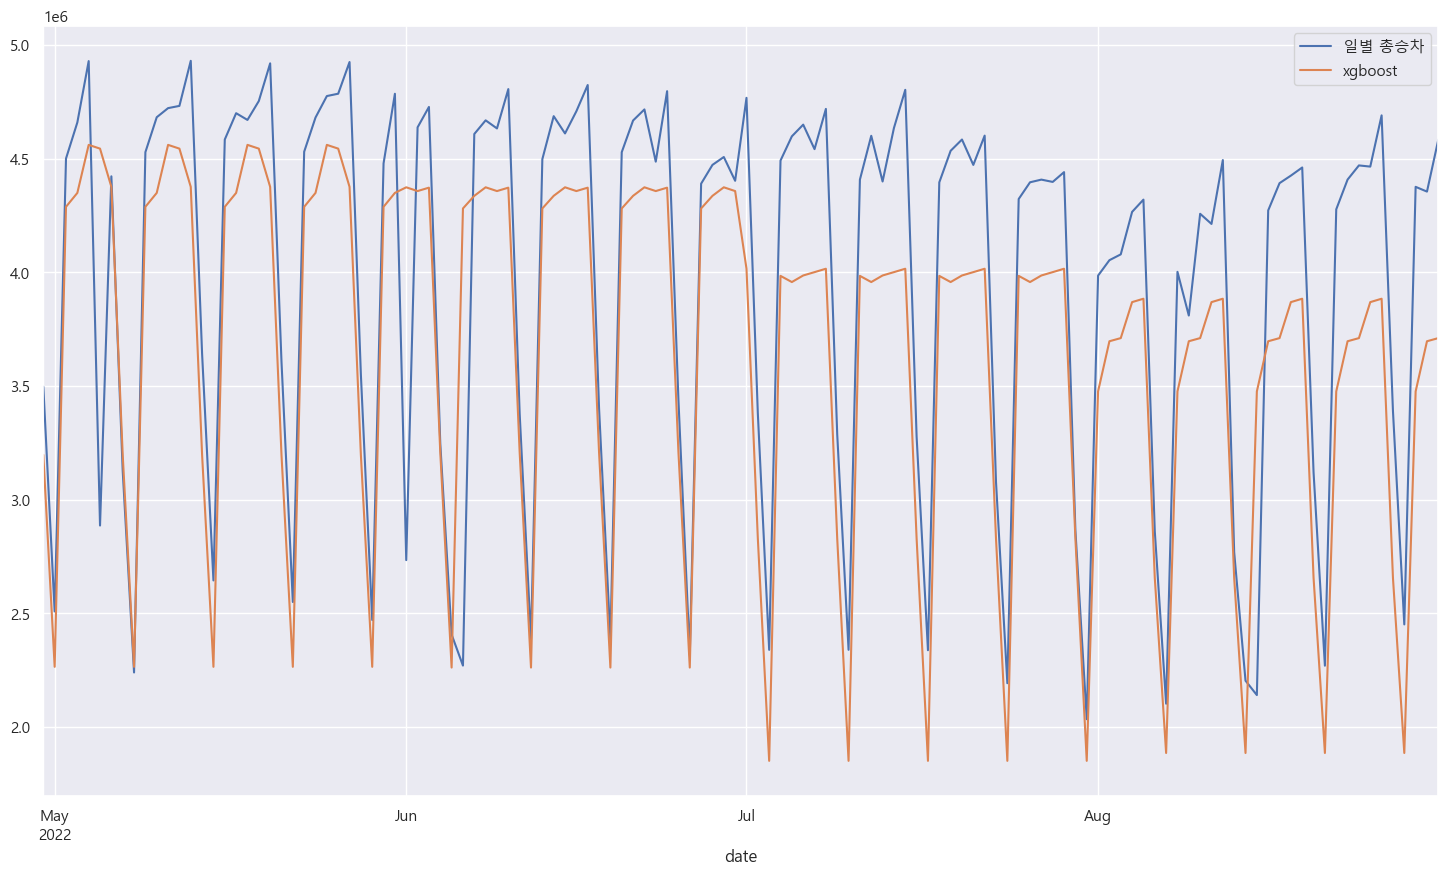

In [540]:
split = '2022-04-30'
get_result_total(split)

# 확진자, 사망자 4개 변수로 토대로 한 지하철 일별 총승차 예측 (~23/1/31)

In [752]:
df_r = dataset_total[dataset_total['date'] < '2022-09-01'][['date','서울','서울시 당일사망자', '전국 당일 사망자', '일별 총승차','전국']]

In [753]:
df_r = df_r.set_index('date')

<AxesSubplot:>

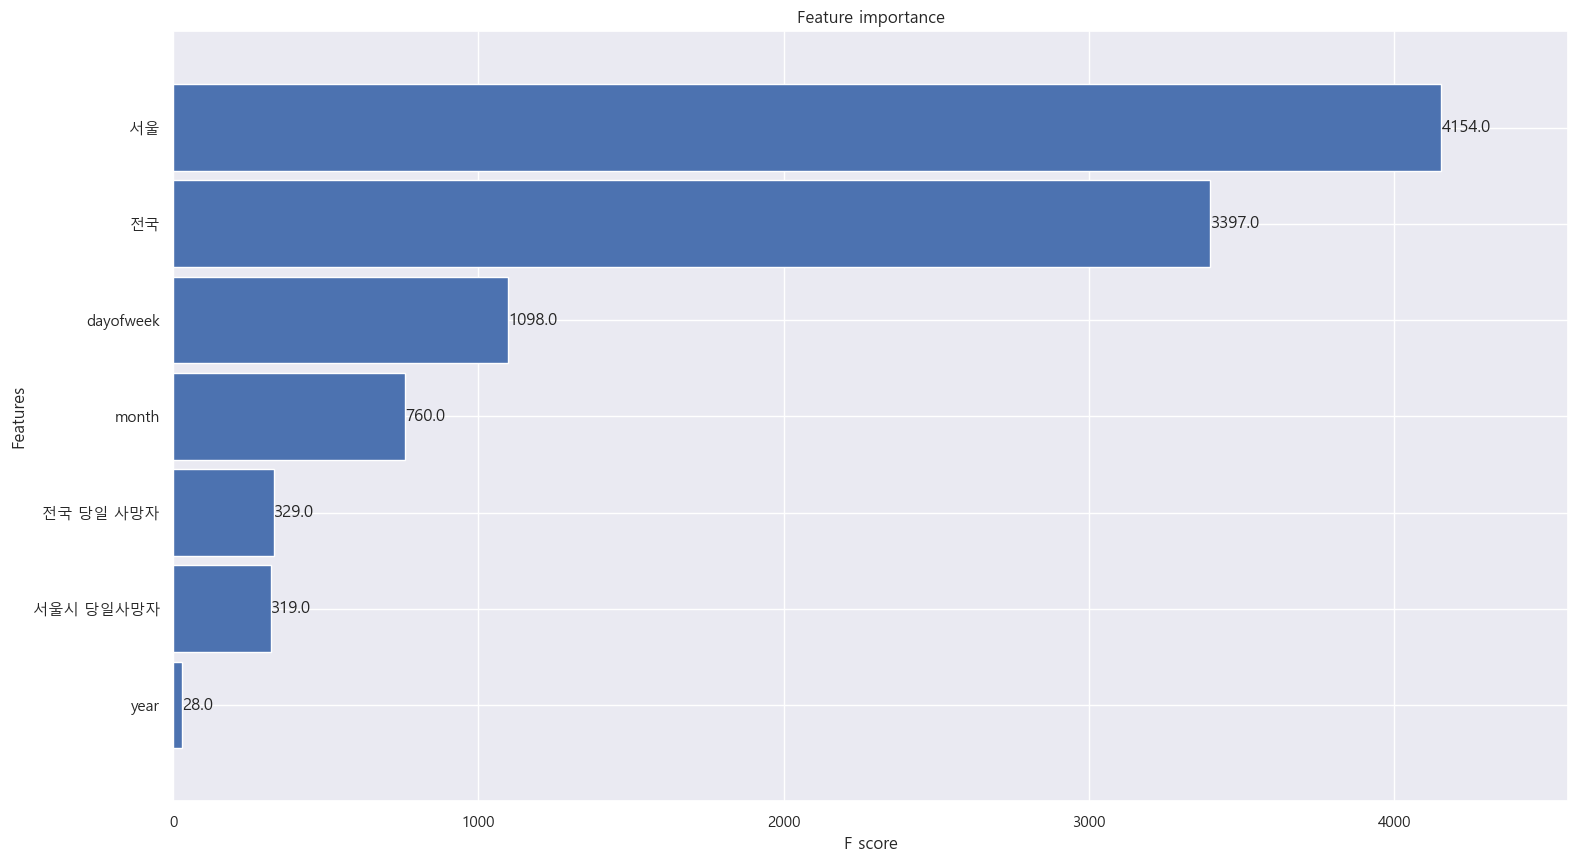

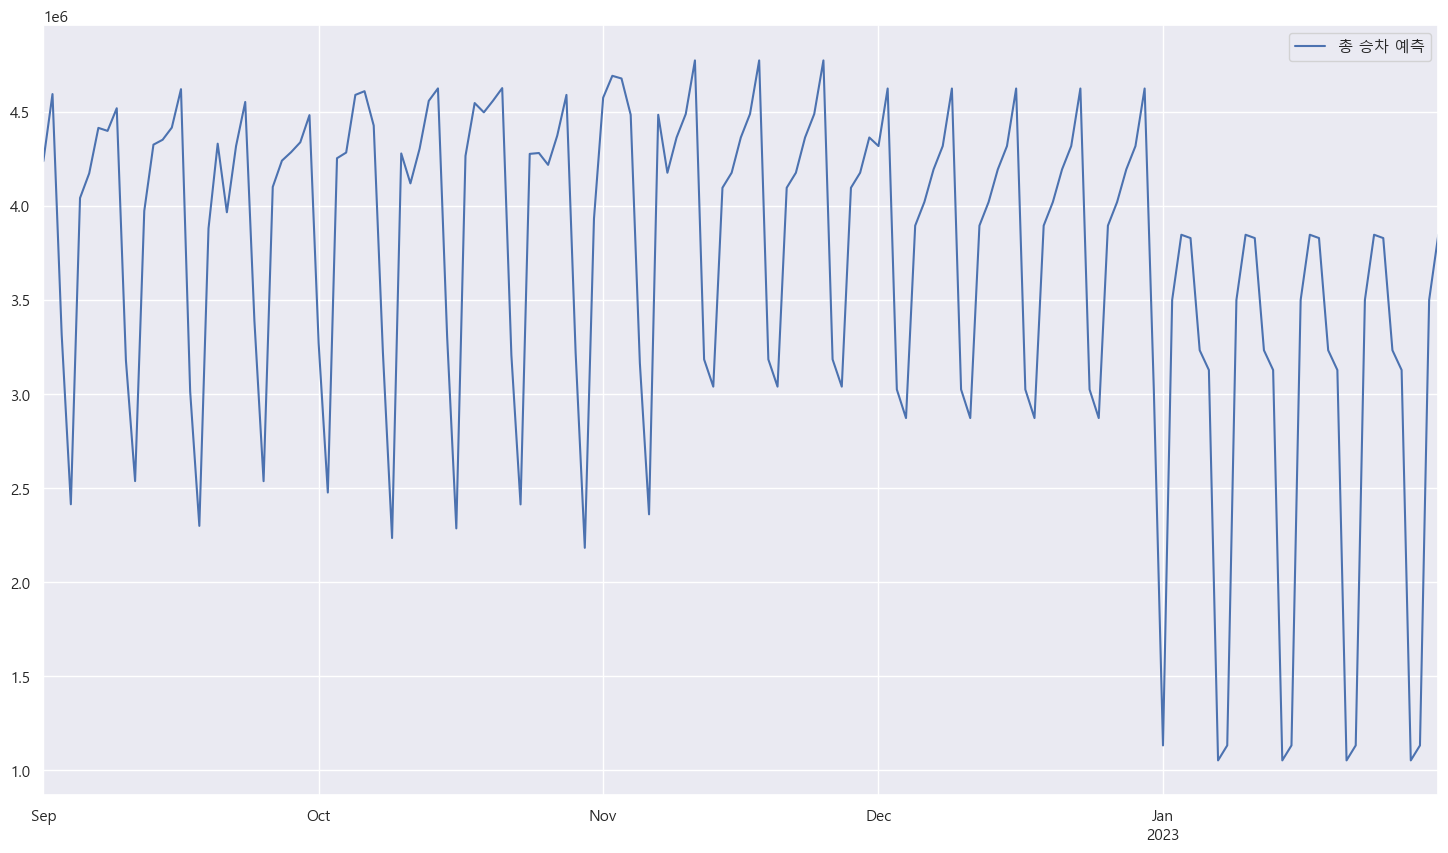

In [754]:
df_r['month'] = df_r.index.month
df_r['year'] = df_r.index.year
df_r['dayofweek'] = df_r.index.dayofweek


y = df_r.loc[:, '일별 총승차']
X = df_r.drop('일별 총승차', axis=1)

XG_model_month = xgb.XGBRegressor(n_estimators=300)
XG_model_month.fit(X, y, eval_set=[(X, y)], early_stopping_rounds=50,verbose=False)
plot_importance(XG_model_month, height=0.9)

df_pred_r = dataset_total[dataset_total['date'] >= '2022-09-01']
df_pred_r.drop('일별 총승차', axis=1, inplace=True)
df_pred_r.set_index('date', inplace=True)
df_pred_r['month'] = df_pred_r.index.month
df_pred_r['year'] = df_pred_r.index.year
df_pred_r['dayofweek'] = df_pred_r.index.dayofweek

xgboost = XG_model_month.predict(df_pred_r)

future = pd.date_range(start='2022-09-01', end='2023-01-31')
xgboost = pd.DataFrame(xgboost, index=future)
xgboost.rename(columns={0:'총 승차 예측'}, inplace=True)

xgboost.plot()

# 강남 총 승차 예측

In [773]:
df_g = dataset[dataset['역명'] == '강남']
df_g.drop(['Unnamed: 0','호선', '역명'], axis=1, inplace=True)

df_g['전국'] = df_g['전국 일일 확진자'] - df_g['서울시 일일 확진자']
df_g['전국 사망'] = df_g['전국 당일 사망자'] - df_g['서울시 당일사망자']
df_g.drop(['전국 일일 확진자', '전국 당일 사망자'], axis=1, inplace=True)

df_g.set_index('date', inplace=True)
df_g['month'] = df_g.index.month
df_g['year'] = df_g.index.year
df_g['dayofweek'] = df_g.index.dayofweek

y = df_g.loc[:, '총 승차']
X = df_g.drop('총 승차', axis=1)

<AxesSubplot:>

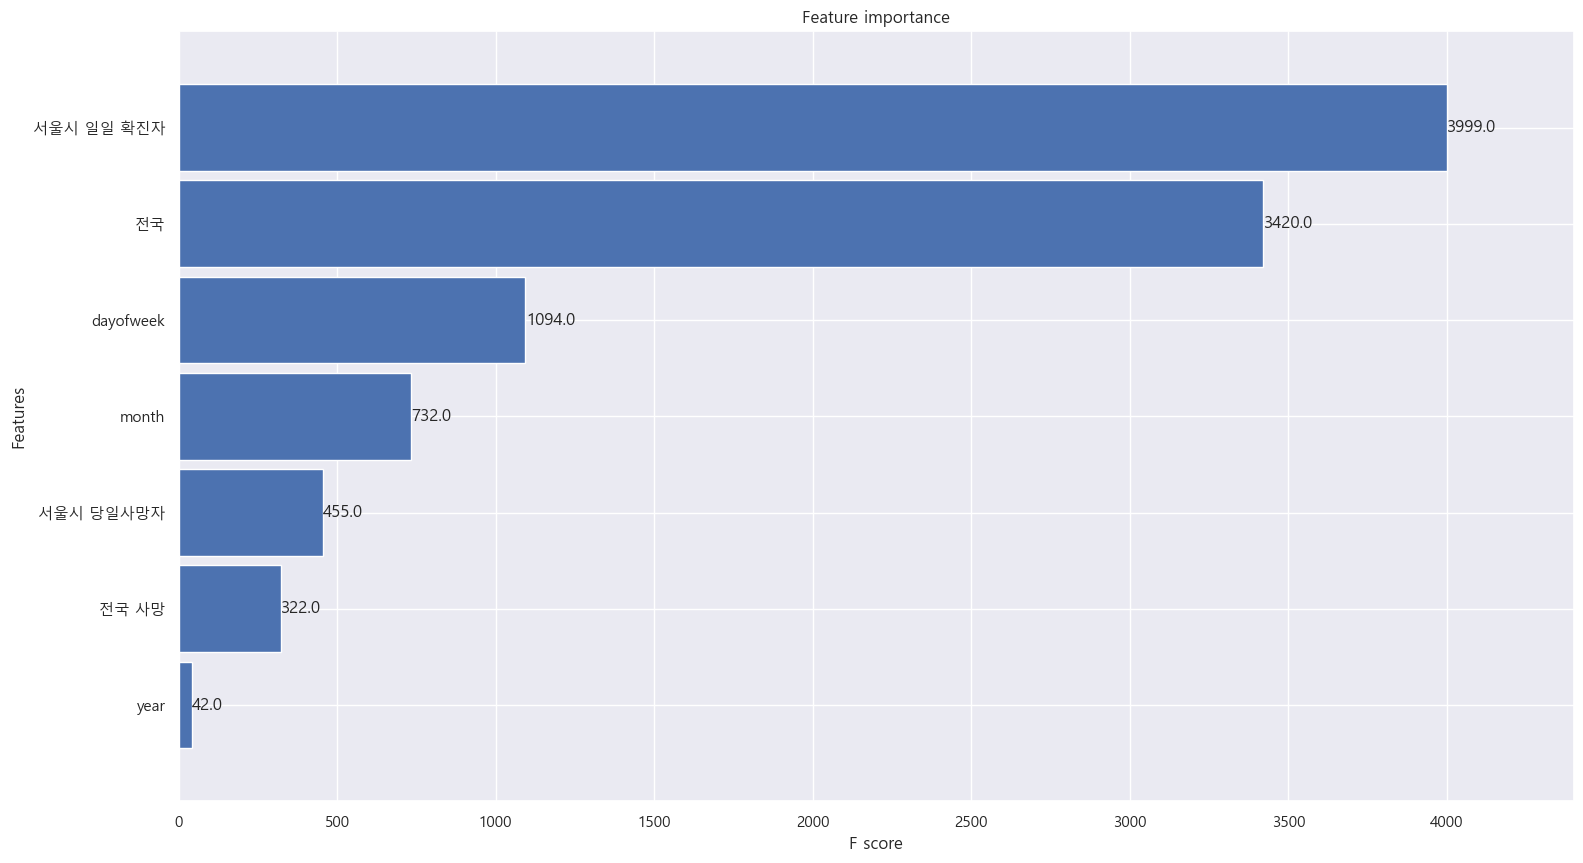

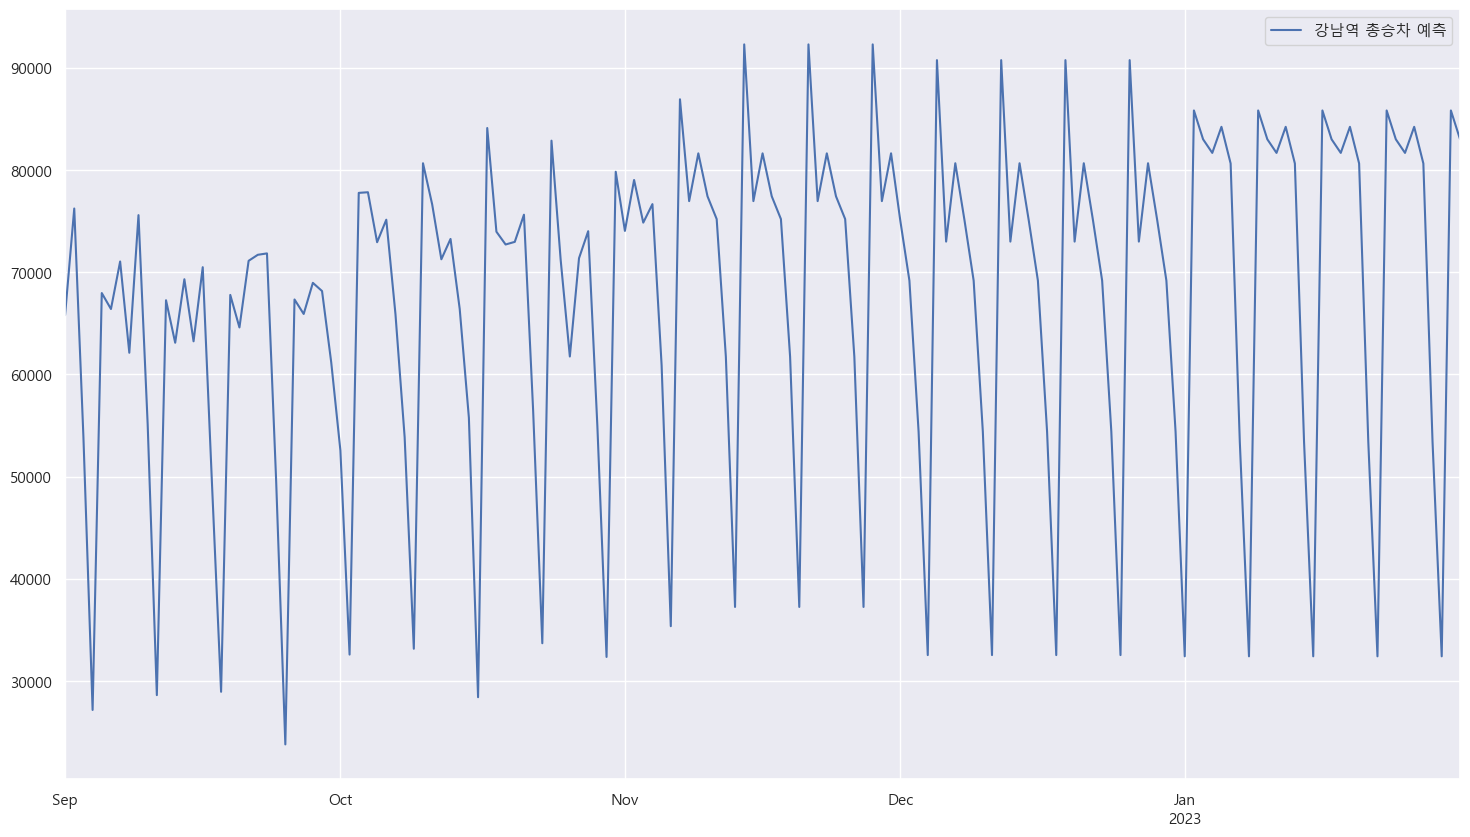

In [774]:
XG_model_month = xgb.XGBRegressor(n_estimators=300)
XG_model_month.fit(X, y, eval_set=[(X, y)], early_stopping_rounds=50,verbose=False)
plot_importance(XG_model_month, height=0.9)

df_pred_r = dataset_total[dataset_total['date'] >= '2022-09-01']
df_pred_r.drop('일별 총승차', axis=1, inplace=True)
df_pred_r.set_index('date', inplace=True)
df_pred_r['month'] = df_pred_r.index.month
df_pred_r['year'] = df_pred_r.index.year
df_pred_r['dayofweek'] = df_pred_r.index.dayofweek

xgboost = XG_model_month.predict(df_pred_r)

future = pd.date_range(start='2022-09-01', end='2023-01-31')
xgboost = pd.DataFrame(xgboost, index=future)
xgboost.rename(columns={0:'강남역 총승차 예측'}, inplace=True)

xgboost.plot()

In [776]:
xgboost.to_excel('강남역 총승차 예측.xlsx')